In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [7]:
df = pd.read_csv(r"C:\Users\tarus\infosys_springboard_internship\fashion_dataset.csv")
df.head()

id  gender masterCategory subCategory articleType baseColour  season  \
0   8493   Women        Apparel  Bottomwear      Skirts      Black    Fall   
1  30757     Men        Apparel     Topwear      Kurtas       Grey  Summer   
2  14881   Women    Accessories        Bags    Handbags      Black  Summer   
3  48449     Men        Apparel     Topwear     Tshirts       Blue  Summer   
4   4697  Unisex    Accessories     Watches     Watches      Black  Winter   

     year   usage                                 productDisplayName  ...  \
0  2011.0  Casual                     Forever New Women Black Skirts  ...   
1  2012.0  Ethnic                 Fabindia Men Grey Mangalgiri Kurta  ...   
2  2011.0  Casual  United Colors of Benetton Women Solid Black Ha...  ...   
3  2012.0  Casual                 French Connection Men Blue T-shirt  ...   
4  2016.0  Sports           ADIDAS Unisex Digital Duramo Black Watch  ...   

                                                link ratings  \
0  http://assets.myntassets.com/v1/images/style/p...       5   
1  http://assets.myntassets.com/v1/images/style/p...       4   
2  http://assets.myntassets.com/v1/images/style/p...       3   
3  http://assets.myntassets.com/v1/images/style/p...       5   
4  http://assets.myntassets.com/v1/images/style/p...       4   

                                              review      Month Price (USD)  \
0  Amazing quality! Definitely recommend. Would r...   November          46   
1              Perfect for any occasion, great buy..  September          29   
2                       It's okay, nothing special.!    October          39   
3  Comfortable and stylish, worth the price. and ...     August          39   
4              Perfect for any occasion, great buy.!      March          33   

   user_id1  user_id2  user_id3  user_id4  user_id5  
0     93810     67912     12506     31747     17972  
1     24592     54541     98358     62538     23573  
2     13278     34966     71797     93928     90931  
3     46048     40972     76426     52622     68556  
4     42098     58790     98835     49226     67898  

[5 rows x 21 columns]

In [8]:
df.shape

(36484, 21)

<h3>handling missing values</h3>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36484 entries, 0 to 36483
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  36484 non-null  int64  
 1   gender              36484 non-null  object 
 2   masterCategory      36484 non-null  object 
 3   subCategory         36484 non-null  object 
 4   articleType         36484 non-null  object 
 5   baseColour          36484 non-null  object 
 6   season              36484 non-null  object 
 7   year                36484 non-null  float64
 8   usage               36484 non-null  object 
 9   productDisplayName  36484 non-null  object 
 10  filename            36484 non-null  object 
 11  link                36484 non-null  object 
 12  ratings             36484 non-null  int64  
 13  review              36484 non-null  object 
 14  Month               36484 non-null  object 
 15  Price (USD)         36484 non-null  int64  
 16  user

In [10]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
user_id1              0
user_id2              0
user_id3              0
user_id4              0
user_id5              0
dtype: int64

In [11]:
df.usage.value_counts()

usage
Casual          27597
Sports           3707
Ethnic           3040
Formal           2043
Smart Casual       64
Travel             26
Party               7
Name: count, dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.describe()

id          year       ratings   Price (USD)      user_id1  \
count  36484.000000  36484.000000  36484.000000  36484.000000  36484.000000   
mean   27860.189124   2012.461737      3.600839     33.828610  55673.109336   
std    16562.799723      1.860980      1.279767     11.320579  25987.221109   
min     1163.000000   2007.000000      1.000000     10.000000  10022.000000   
25%    13247.000000   2011.000000      3.000000     25.000000  32865.000000   
50%    26471.500000   2012.000000      4.000000     34.000000  55706.000000   
75%    41718.250000   2012.000000      5.000000     42.000000  78386.000000   
max    60000.000000   2018.000000      5.000000     66.000000  99995.000000   

           user_id2      user_id3      user_id4      user_id5  
count  36484.000000  36484.000000  36484.000000  36484.000000  
mean   55644.336860  55940.164620  55756.701376  55578.292265  
std    25931.841932  26019.922872  26003.137835  25857.425506  
min    10022.000000  10022.000000  10022.000000  10022.000000  
25%    32833.000000  33010.000000  33002.000000  32871.000000  
50%    55697.000000  56129.000000  55656.000000  55603.000000  
75%    78303.000000  78712.000000  78665.000000  78021.000000  
max    99995.000000  99995.000000  99995.000000  99995.000000

In [14]:
catnames = [ 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season','usage','Month']
numnames = ['id','year','ratings','Price (USD)']

<h3>categorical data analysis</h3>

In [15]:
for i in catnames:
    print(f'{i}: {df[i].unique()}')

gender: ['Women' 'Men' 'Unisex' 'Boys' 'Girls']
masterCategory: ['Apparel' 'Accessories' 'Footwear']
subCategory: ['Bottomwear' 'Topwear' 'Bags' 'Watches' 'Shoes' 'Flip Flops' 'Jewellery'
 'Eyewear' 'Belts' 'Saree' 'Loungewear and Nightwear' 'Wallets' 'Socks']
articleType: ['Skirts' 'Kurtas' 'Handbags' 'Tshirts' 'Watches' 'Formal Shoes'
 'Flip Flops' 'Heels' 'Leggings' 'Backpacks' 'Earrings' 'Clutches'
 'Shirts' 'Casual Shoes' 'Dupatta' 'Jeans' 'Tops' 'Ring' 'Flats'
 'Suspenders' 'Sports Shoes' 'Sunglasses' 'Shorts' 'Belts' 'Sarees'
 'Nightdress' 'Jackets' 'Trousers' 'Messenger Bag' 'Track Pants' 'Kurtis'
 'Capris' 'Nehru Jackets' 'Sweatshirts' 'Wallets' 'Socks'
 'Necklace and Chains' 'Stockings' 'Waist Pouch' 'Patiala' 'Tunics'
 'Booties' 'Lounge Pants' 'Sweaters' 'Pendant' 'Duffel Bag' 'Tracksuits'
 'Baby Dolls' 'Bath Robe' 'Laptop Bag' 'Night suits' 'Tights' 'Jeggings'
 'Mobile Pouch' 'Jewellery Set' 'Lounge Shorts' 'Swimwear' 'Bangle'
 'Churidar' 'Salwar' 'Shrug' 'Bracelet' 'Waistc

<h3>outlier detection</h3>

In [16]:
dict_unique = {
    "numerical_columns": numnames,
    "unique_values": [df[i].nunique() for i in numnames]
}

In [17]:
df_unique = pd.DataFrame(dict_unique)
df_unique

numerical_columns  unique_values
0                id          36484
1              year             12
2           ratings              5
3       Price (USD)             57

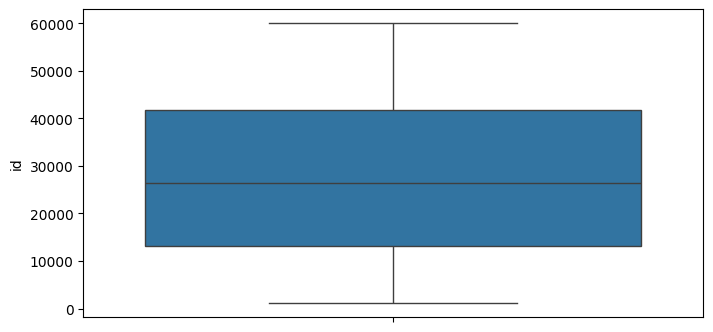

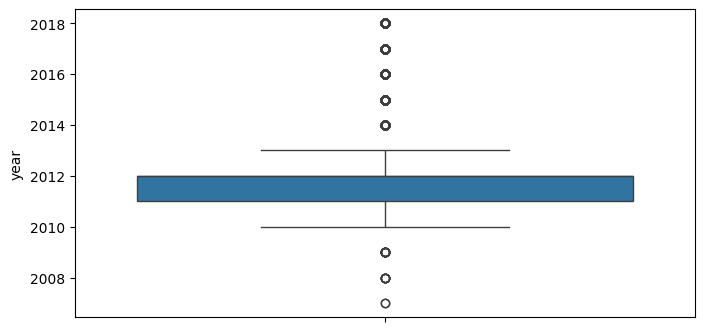

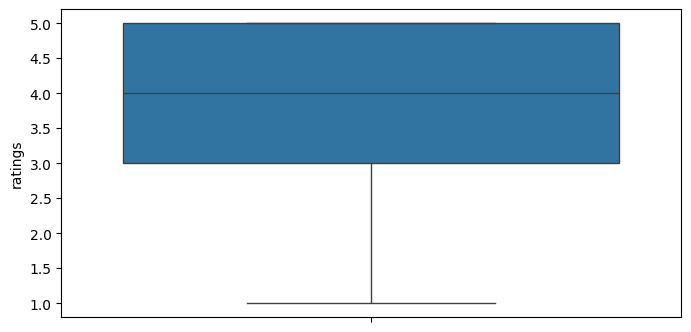

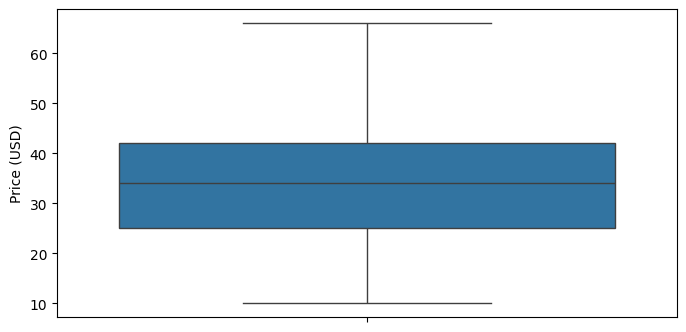

In [18]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

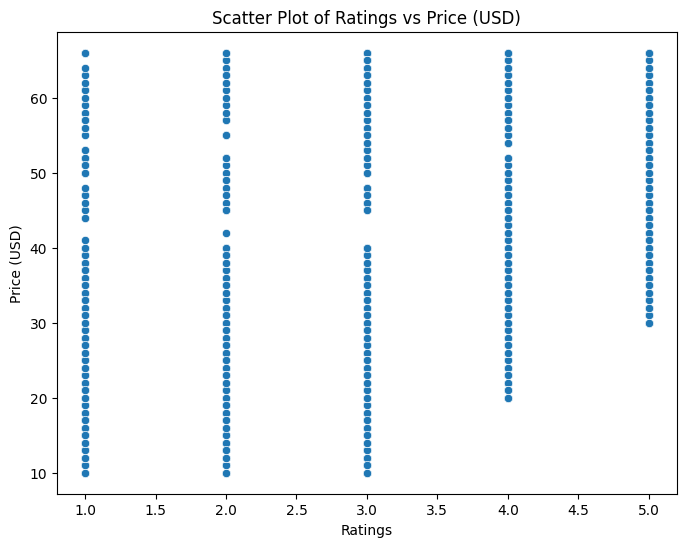

In [19]:
# Scatter plot for Ratings vs Price (USD)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ratings', y='Price (USD)')
plt.title('Scatter Plot of Ratings vs Price (USD)')
plt.xlabel('Ratings')
plt.ylabel('Price (USD)')
plt.show()


In [20]:
q25,q75 = np.percentile(df["year"],[25,75])

In [21]:
iqr = q75 - q25
iqr

1.0

In [22]:
q0 = q25 - 1.5*iqr
q100 = q75 + 1.4*iqr
q0,q100

(2009.5, 2013.4)

In [23]:
df = df[(df['year'] >= q0) & (df['year'] <= q100)]

In [24]:
df

id  gender masterCategory subCategory   articleType baseColour  \
0       8493   Women        Apparel  Bottomwear        Skirts      Black   
1      30757     Men        Apparel     Topwear        Kurtas       Grey   
2      14881   Women    Accessories        Bags      Handbags      Black   
3      48449     Men        Apparel     Topwear       Tshirts       Blue   
6      12868     Men       Footwear       Shoes  Formal Shoes      Black   
...      ...     ...            ...         ...           ...        ...   
36475  54078     Men       Footwear       Shoes  Sports Shoes     Orange   
36476  13183     Men       Footwear       Shoes  Sports Shoes      White   
36477  10264     Men       Footwear       Shoes  Formal Shoes      Black   
36479  45378   Women       Footwear       Shoes         Flats      Black   
36483   5864  Unisex       Footwear       Shoes  Casual Shoes  Navy Blue   

       season    year   usage  \
0        Fall  2011.0  Casual   
1      Summer  2012.0  Ethnic   
2      Summer  2011.0  Casual   
3      Summer  2012.0  Casual   
6      Spring  2012.0  Formal   
...       ...     ...     ...   
36475  Summer  2012.0  Sports   
36476    Fall  2011.0  Sports   
36477  Summer  2013.0  Formal   
36479  Summer  2012.0  Casual   
36483  Winter  2011.0  Casual   

                                      productDisplayName  ...  \
0                         Forever New Women Black Skirts  ...   
1                     Fabindia Men Grey Mangalgiri Kurta  ...   
2      United Colors of Benetton Women Solid Black Ha...  ...   
3                     French Connection Men Blue T-shirt  ...   
6                      Lee Cooper Men Formal Black Shoes  ...   
...                                                  ...  ...   
36475    ADIDAS Men Orange F50 Adizero HG Football Shoes  ...   
36476                 Fila Men Dls 96 White Sports Shoes  ...   
36477    Clarks Men Goya Band Leather Black Formal Shoes  ...   
36479                          Rocia Women Black Sandals  ...   
36483  Converse Chuck Taylor All Star Unisex Navy Blu...  ...   

                                                    link ratings  \
0      http://assets.myntassets.com/v1/images/style/p...       5   
1      http://assets.myntassets.com/v1/images/style/p...       4   
2      http://assets.myntassets.com/v1/images/style/p...       3   
3      http://assets.myntassets.com/v1/images/style/p...       5   
6      http://assets.myntassets.com/v1/images/style/p...       3   
...                                                  ...     ...   
36475  http://assets.myntassets.com/v1/images/style/p...       5   
36476  http://assets.myntassets.com/v1/images/style/p...       5   
36477  http://assets.myntassets.com/v1/images/style/p...       5   
36479  http://assets.myntassets.com/v1/images/style/p...       5   
36483  http://assets.myntassets.com/v1/images/style/p...       2   

                                                  review      Month  \
0      Amazing quality! Definitely recommend. Would r...   November   
1                  Perfect for any occasion, great buy..  September   
2                           It's okay, nothing special.!    October   
3      Comfortable and stylish, worth the price. and ...     August   
6      Satisfactory for the price. for special occasi...     August   
...                                                  ...        ...   
36475  Exceeded expectations, love the fit! but could...  September   
36476  Perfect for any occasion, great buy. and I'm v...    January   
36477              Exceeded expectations, love the fit!.   November   
36479  High quality fabric, very satisfied. and I'm v...   November   
36483            Not as described, low-quality product.!   February   

      Price (USD)  user_id1  user_id2  user_id3  user_id4  user_id5  
0              46     93810     67912     12506     31747     17972  
1              29     24592     54541     98358     62538     23573  
2              39     13278     34966  

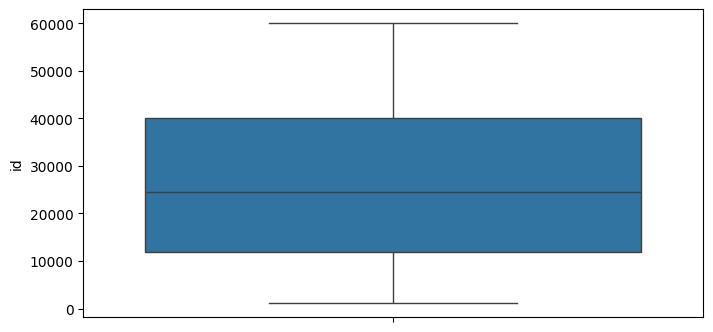

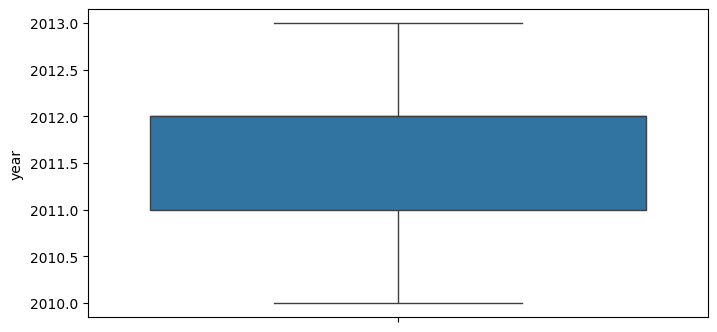

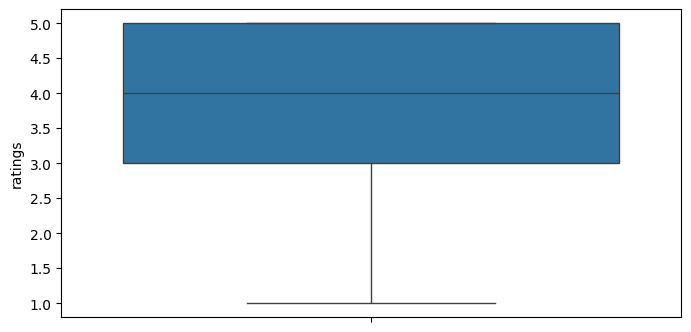

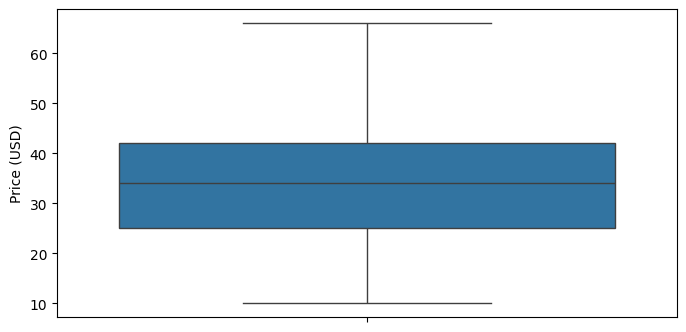

In [25]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

<h3>distribution analysis</h3>

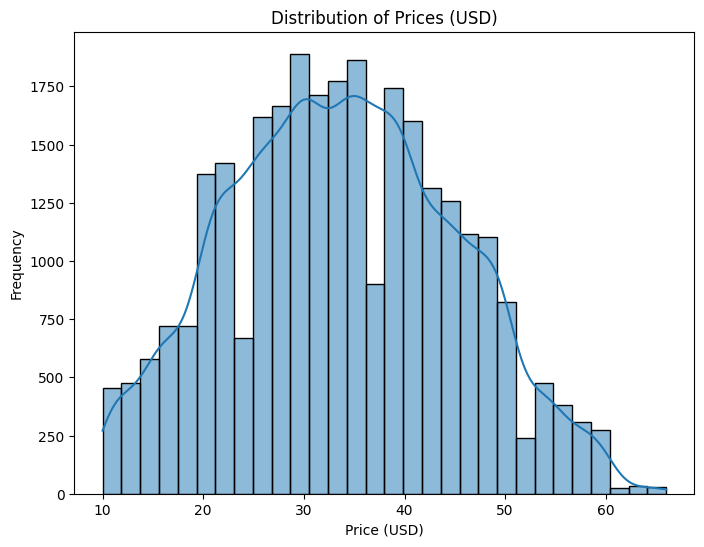

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price (USD)'], bins=30, kde=True)
plt.title('Distribution of Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

id:  0.2925079053459858
year:  -0.044228810268022695
ratings:  -0.6518348738113221
Price (USD):  0.10747816858420171


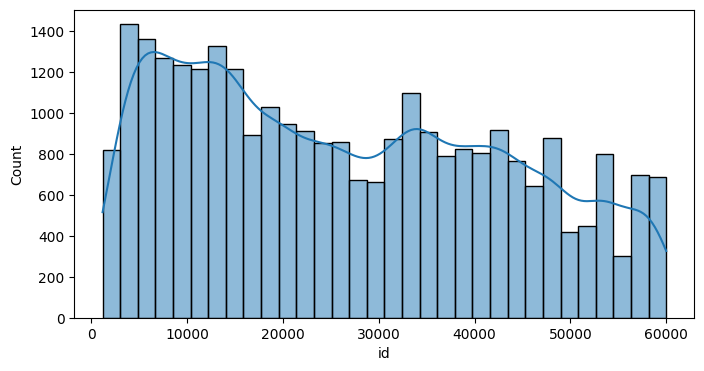

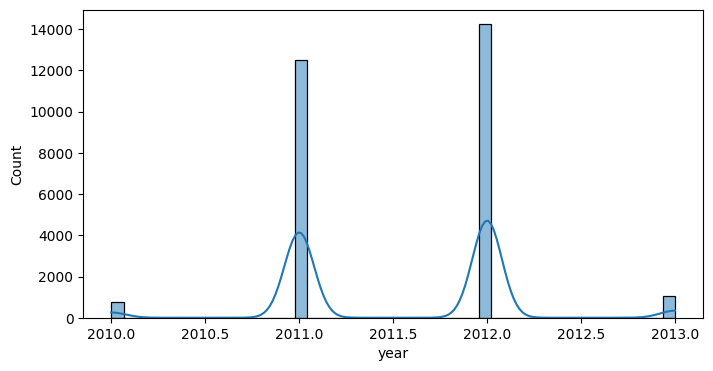

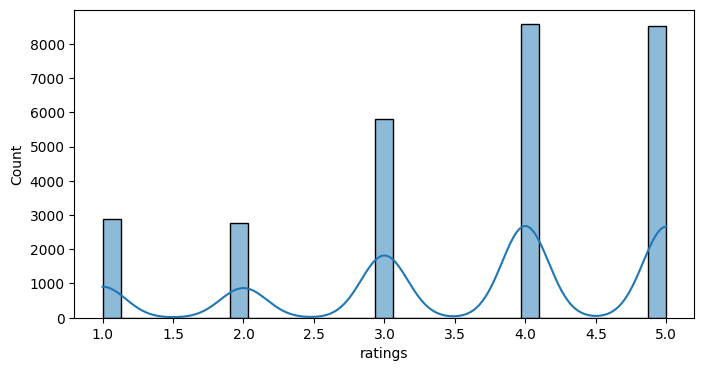

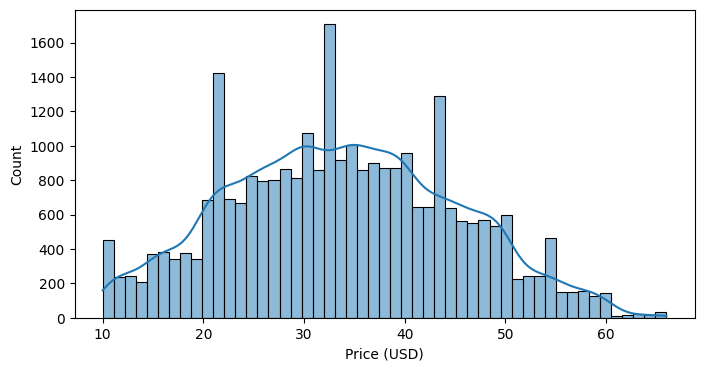

In [27]:
# plotting histograms to check the distribution of numerical data
from scipy.stats import skew
for i in numnames:
    plt.figure(figsize=(8,4))
    print(f"{i}: ",df[i].skew())
    sns.histplot(df[i],kde=True)

<h3>categorical analysis</h3>

Frequency Distribution of categorical columns


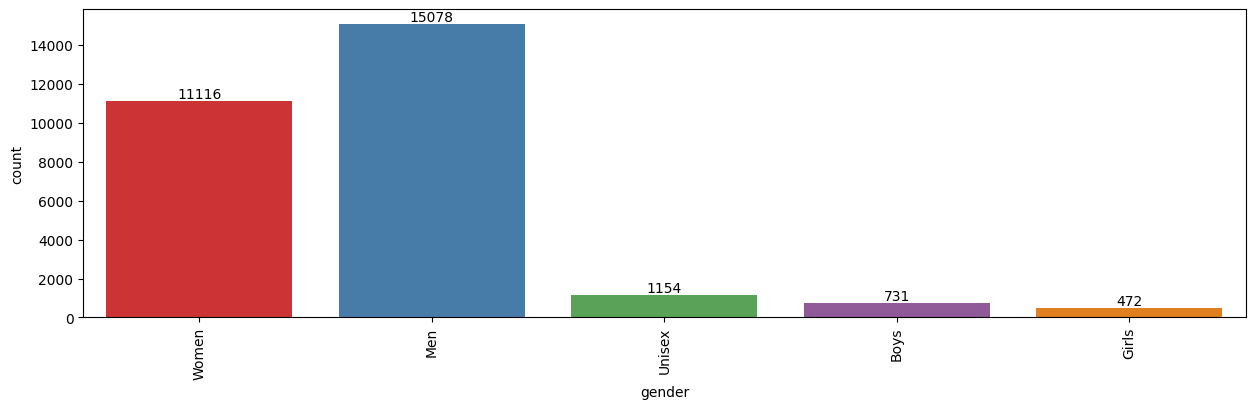

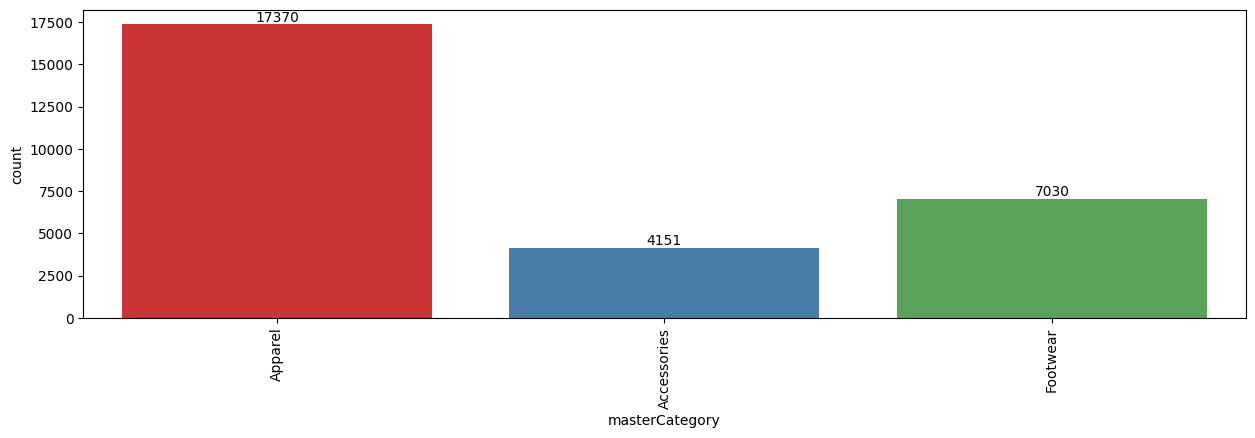

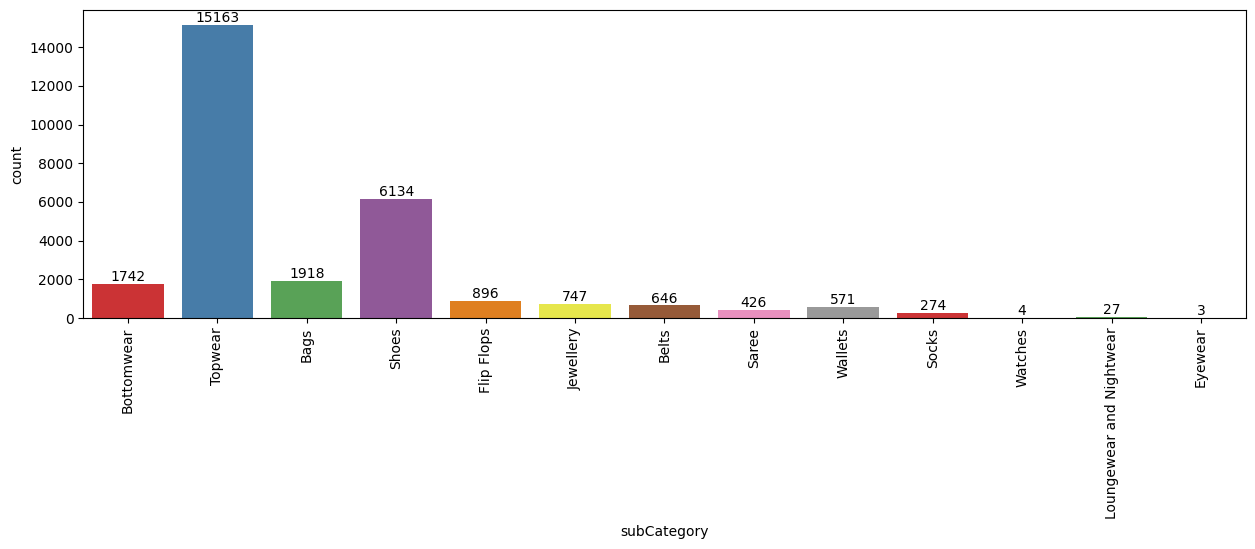

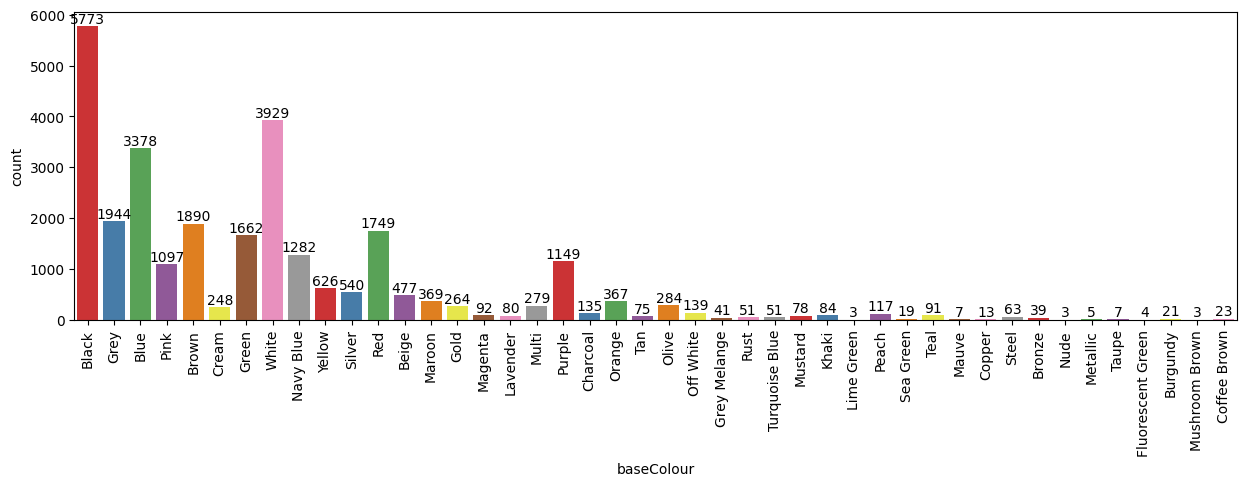

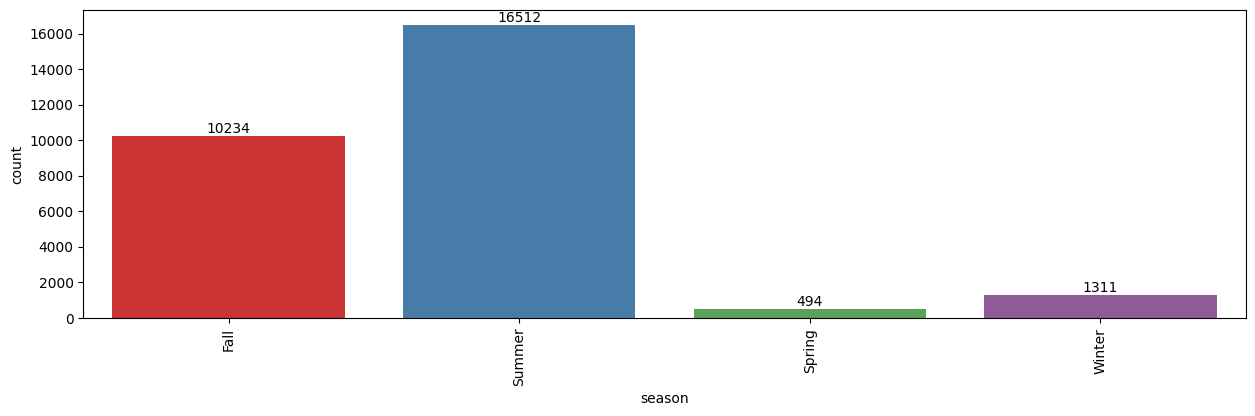

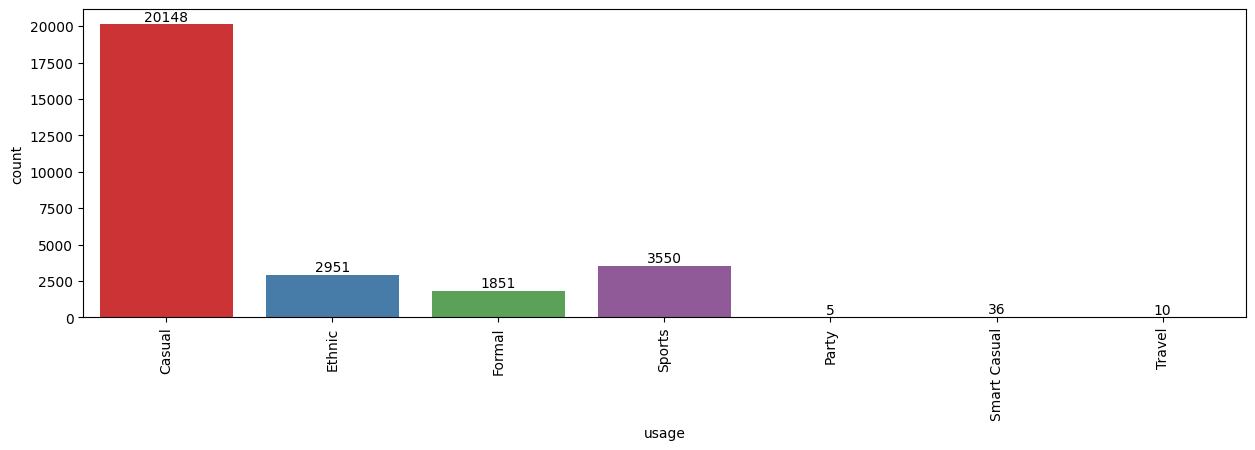

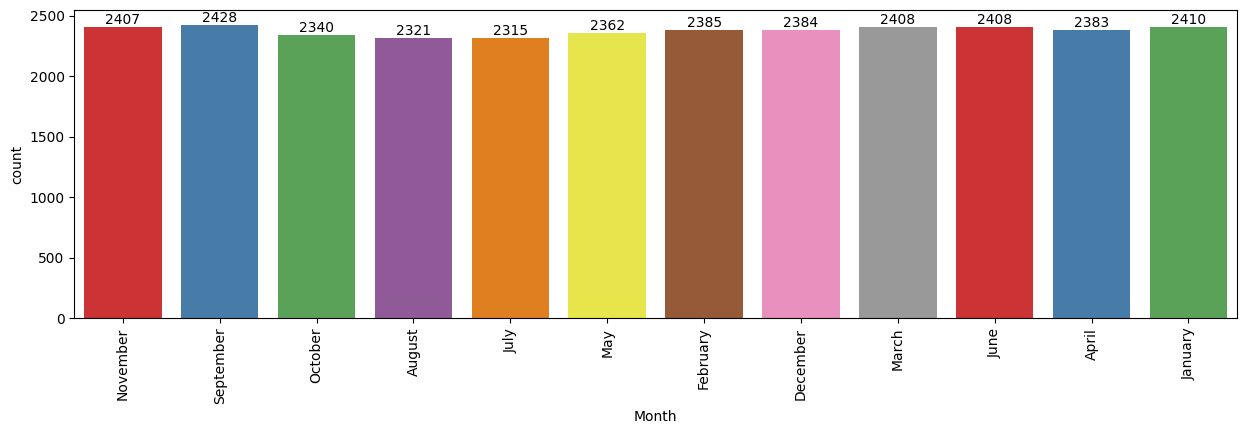

In [28]:
# understanding the distribution and frequency of categorical columns(demographics)
print('Frequency Distribution of categorical columns')
for i in catnames:
    if i == "articleType":
        continue
    plt.figure(figsize=(15, 4))
    ax = sns.countplot(data=df, x=i, palette='Set1')
    plt.xticks(rotation=90)
    for j in ax.containers:
        ax.bar_label(j)

<h3>bivariate analysis</h3>

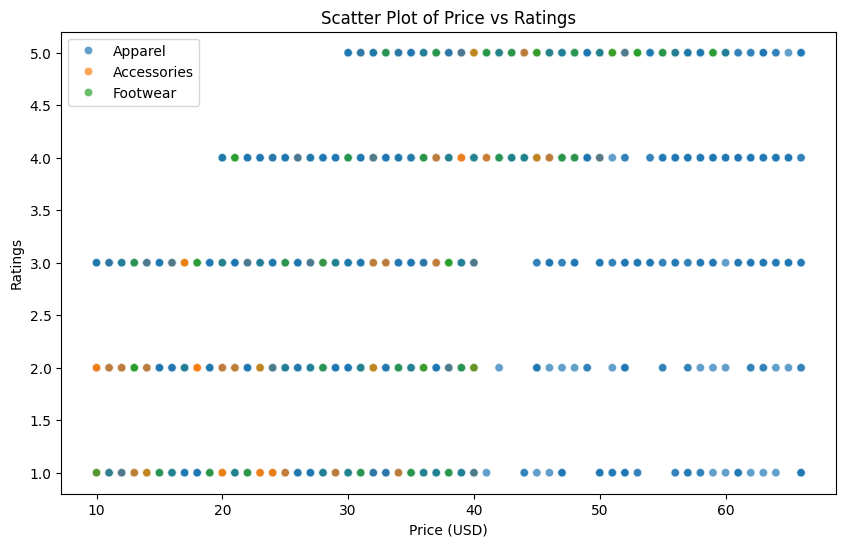

In [29]:
# Scatter plot of Price vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price (USD)', y='ratings', hue='masterCategory', alpha=0.7)
plt.title('Scatter Plot of Price vs Ratings')
plt.xlabel('Price (USD)')
plt.ylabel('Ratings')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Box Plot of Master category by Price(USD)')

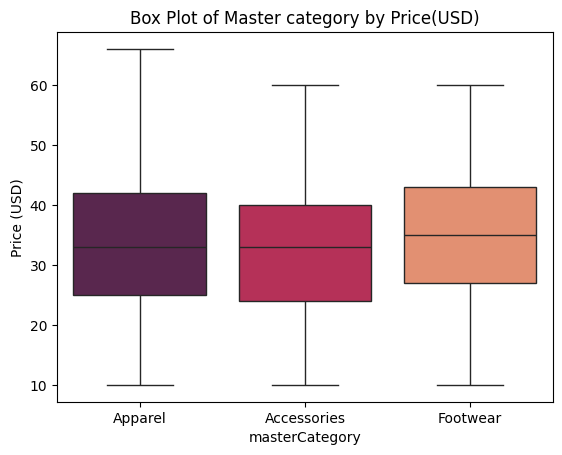

In [30]:
sns.boxplot(df,x='masterCategory',y='Price (USD)',palette='rocket')
plt.title("Box Plot of Master category by Price(USD)")

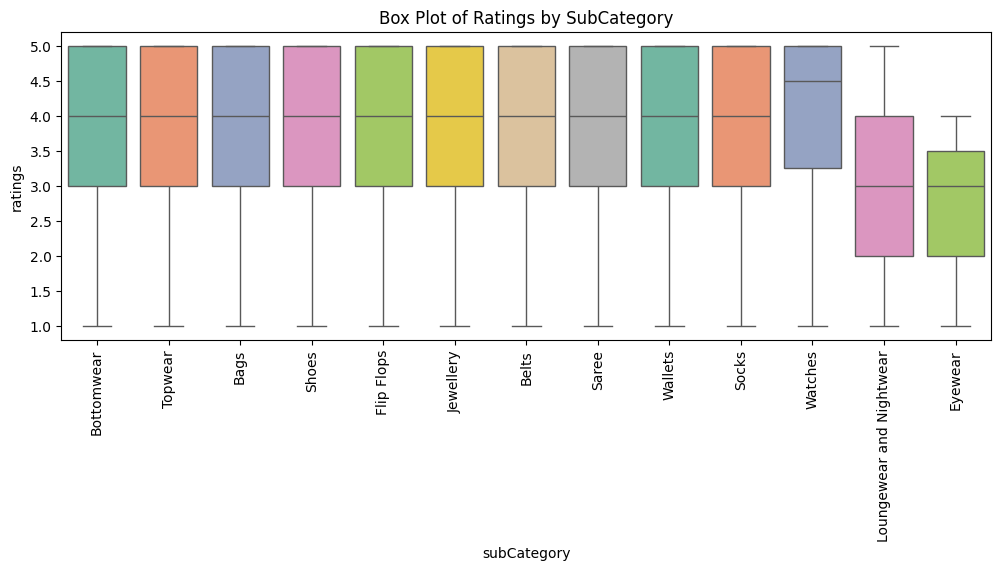

In [31]:
plt.figure(figsize=(12,4))
sns.boxplot(df,x='subCategory',y='ratings',palette='Set2')
plt.title("Box Plot of Ratings by SubCategory")
plt.xticks(rotation=90)
plt.show()

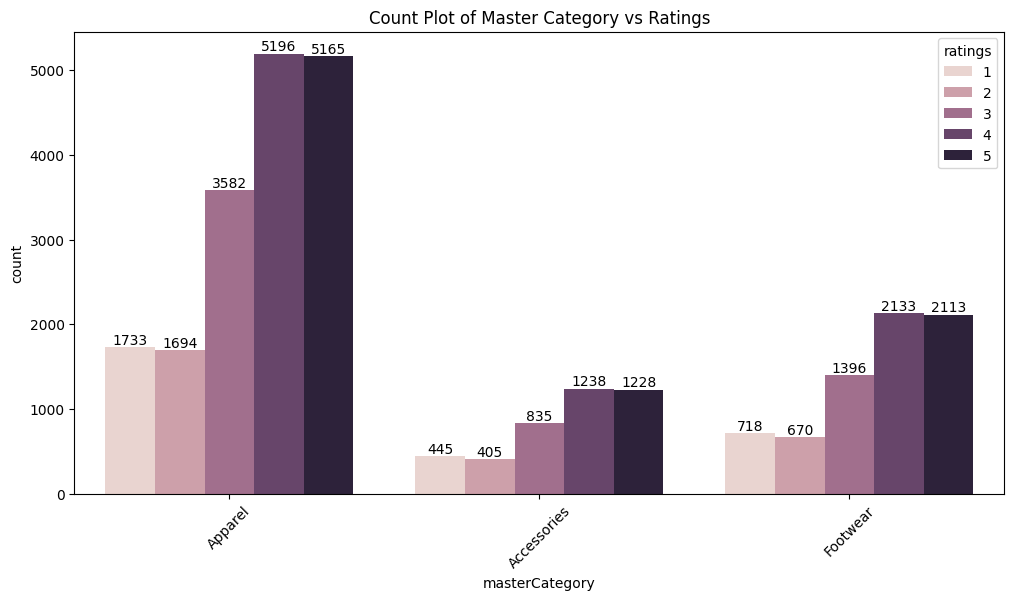

In [32]:
# Count plot of Master Category vs Ratings
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='ratings')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Count Plot of Master Category vs Ratings')
plt.xticks(rotation=45)
plt.show()

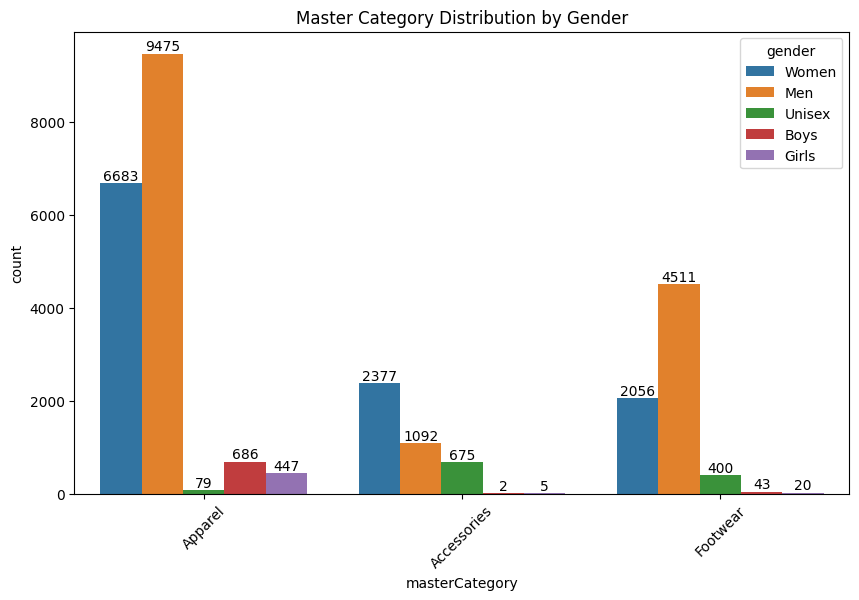

In [33]:
# Master Category vs Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='masterCategory', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Master Category Distribution by Gender')
plt.xticks(rotation=45)
plt.show()

In [34]:
df.subCategory.unique()

array(['Bottomwear', 'Topwear', 'Bags', 'Shoes', 'Flip Flops',
       'Jewellery', 'Belts', 'Saree', 'Wallets', 'Socks', 'Watches',
       'Loungewear and Nightwear', 'Eyewear'], dtype=object)

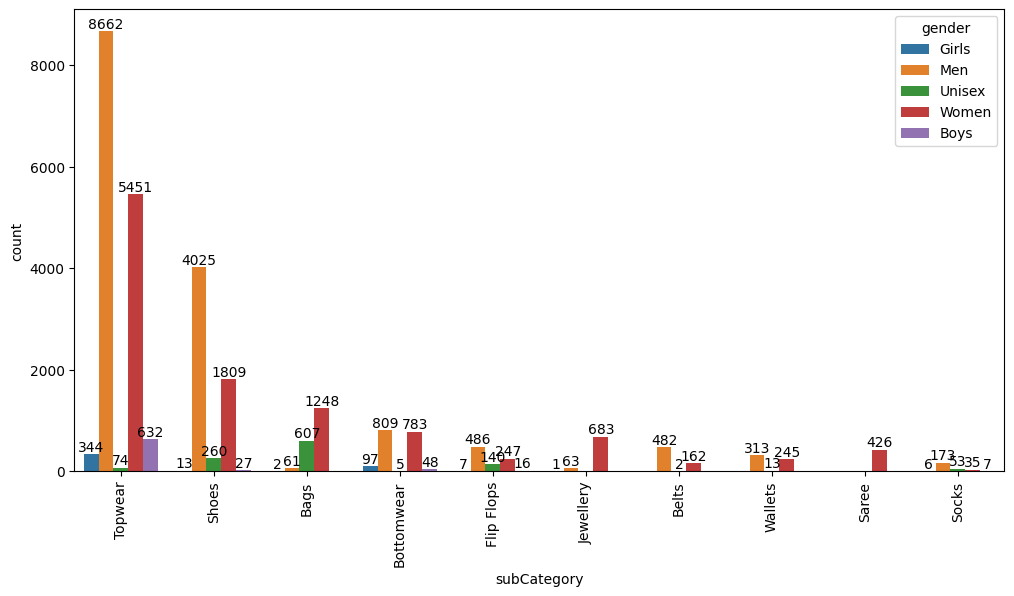

In [35]:
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='gender', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

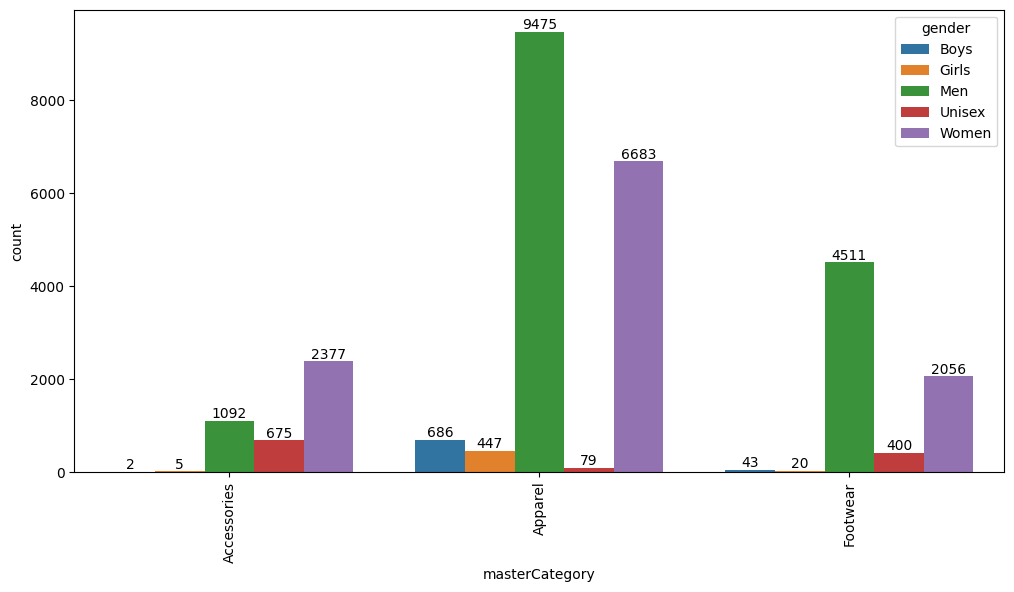

In [36]:
# Master Category vs Gender
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['masterCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='masterCategory', y='count', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

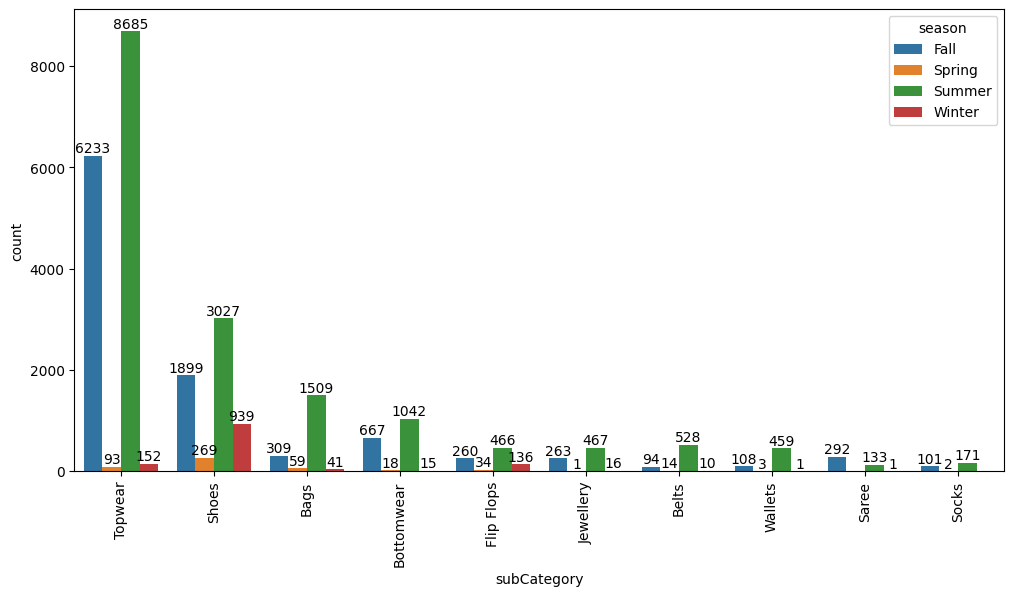

In [37]:
# subcategory vs season
plt.figure(figsize=(12,6))
df_grouped = df.groupby(['subCategory', 'season']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='season', order=df['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

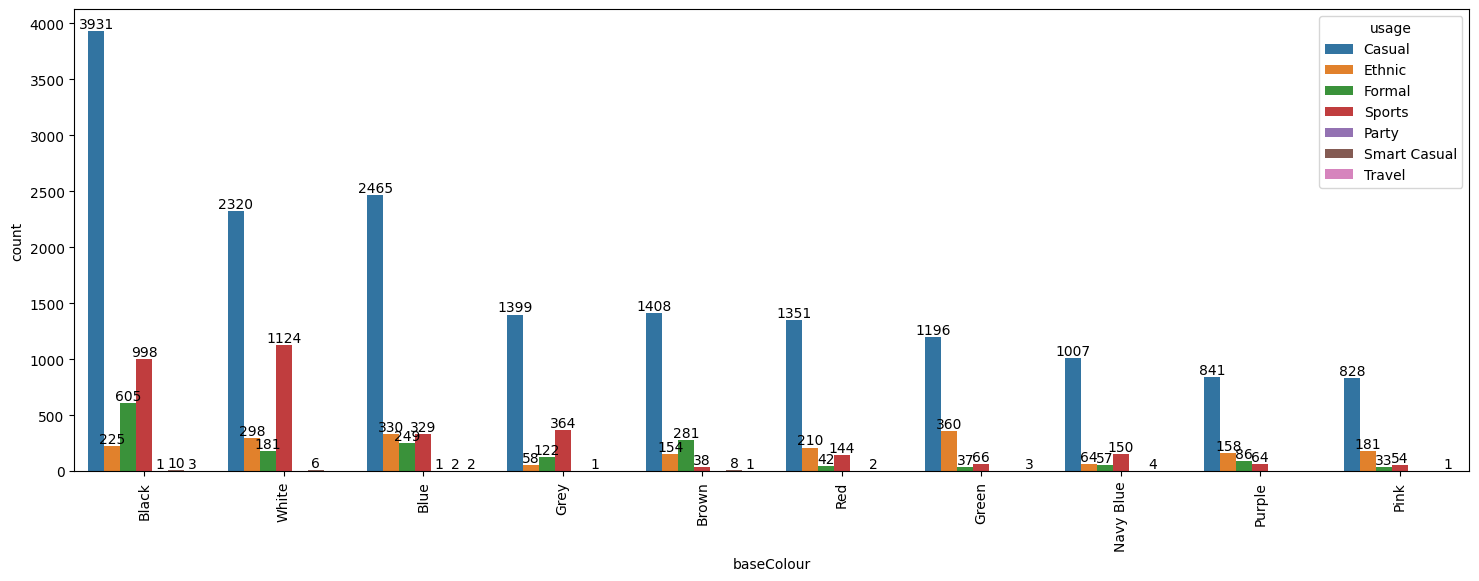

In [38]:
# base colour vs usage
plt.figure(figsize=(18,6))
df_grouped = df.groupby(['baseColour', 'usage']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='baseColour', y='count', hue='usage', order=df['baseColour'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

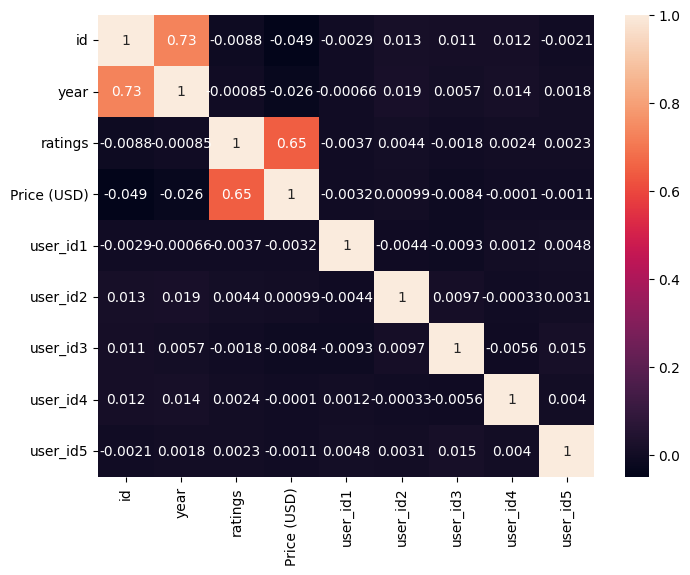

In [39]:
plt.figure(figsize=(8,6))
# Calculate correlation on numeric columns only, including the new 'gender_numeric' column
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

<h3>Time-based analysis/Tren analysis based on Month data</h3>

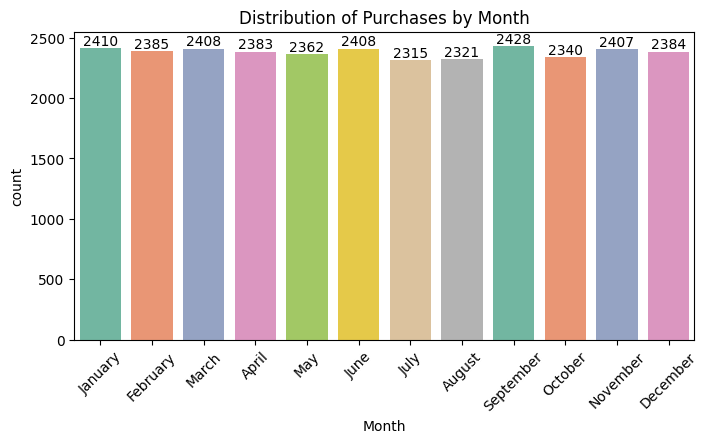

In [40]:
# Count plot for Month
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                   palette="Set2")
for i in ax.containers:
    plt.bar_label(i)
plt.title('Distribution of Purchases by Month')
plt.xticks(rotation=45)
plt.show()

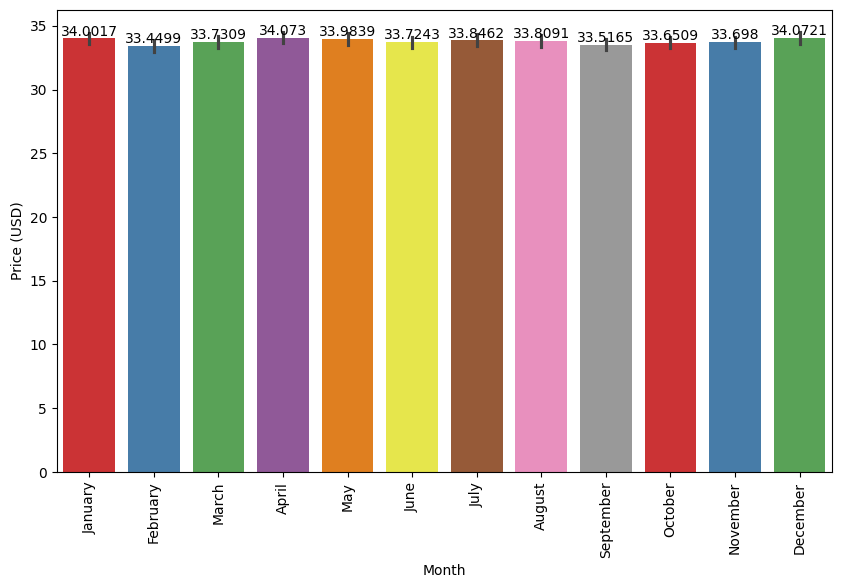

In [41]:
# price(usd) by month
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df,x="Month",y="Price (USD)",palette="Set1",
                 order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

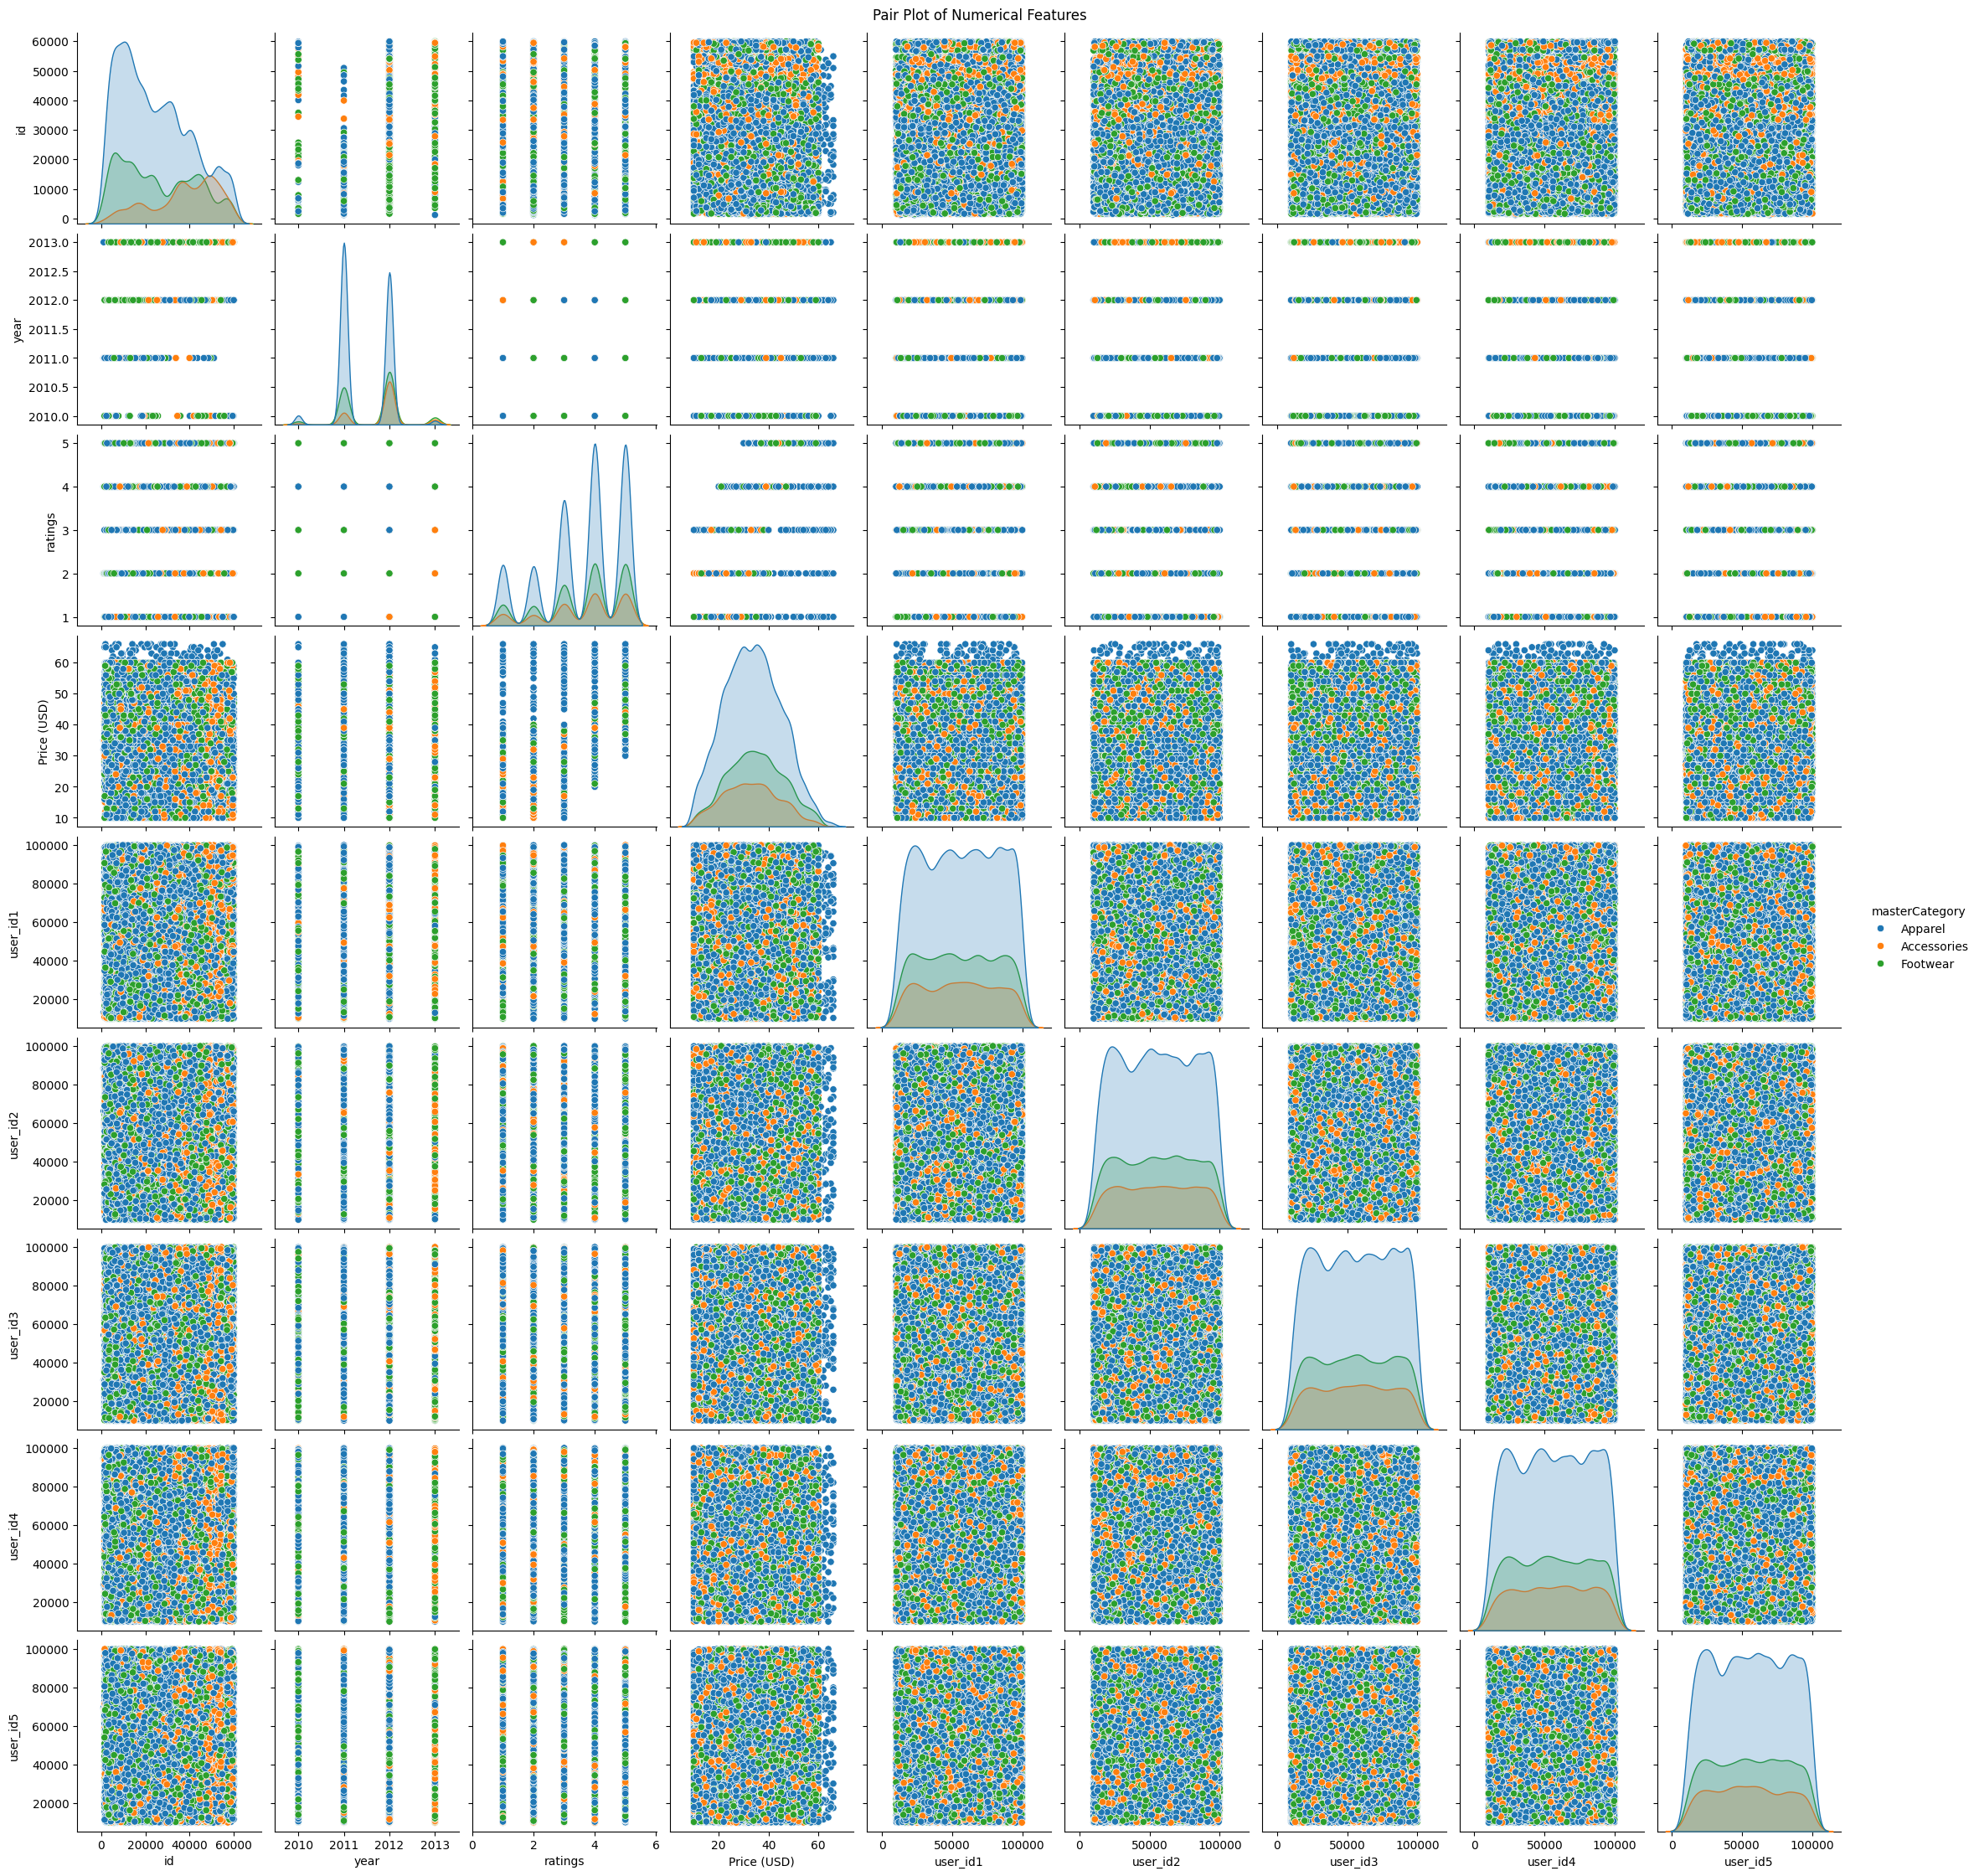

In [42]:
# Reset the index of your DataFrame to ensure it is unique:
df = df.reset_index(drop=True)

# Then, proceed with creating the pair plot:
sns.pairplot(df, diag_kind='kde', hue='masterCategory')
plt.suptitle('Pair Plot of Numerical Features', y=1.0)
plt.show()

<h3>Random oversampling for year column</h3>

In [43]:
from sklearn.utils import resample

# Separate the data into a list of dataframes by year
dfs = [df[df['year'] == year] for year in df['year'].unique()]

# Determine the target number of samples for each year (e.g., the average count)
target_samples = int(np.mean([len(sub_df) for sub_df in dfs]))

# Resample each year group to the target size
dfs_resampled = [resample(sub_df, replace=True, n_samples=target_samples, random_state=42) for sub_df in dfs]

# Combine all resampled groups into a single dataframe
df_balanced = pd.concat(dfs_resampled)

In [44]:
df_balanced.year.value_counts()

year
2011.0    7137
2012.0    7137
2010.0    7137
2013.0    7137
Name: count, dtype: int64

In [45]:
df_balanced.head()

id gender masterCategory subCategory   articleType baseColour  \
16573  23248    Men       Footwear       Shoes  Formal Shoes      Brown   
1968   20191    Men        Apparel     Topwear       Tshirts       Grey   
12353  13836    Men        Apparel  Bottomwear        Shorts  Navy Blue   
11940  15577   Boys        Apparel     Topwear       Tshirts       Blue   
27269   7768    Men        Apparel     Topwear       Tshirts       Grey   

       season    year   usage                           productDisplayName  \
16573    Fall  2011.0  Formal                  Arrow Men Formal Brown Shoe   
1968     Fall  2011.0  Casual               Wrangler Men Grey Polo T-shirt   
12353    Fall  2011.0  Casual           Probase Men Solid Navy Blue Shorts   
11940    Fall  2011.0  Casual  Chhota Bheem Kids Boys Warrior Bheem TShirt   
27269  Summer  2011.0  Sports  Nike Men's As Vapor Ulti Grey Black T-Shirt   

       ...                                               link ratings  \
16573  ...  http://assets.myntassets.com/v1/images/style/p...       4   
1968   ...  http://assets.myntassets.com/v1/images/style/p...       5   
12353  ...  http://assets.myntassets.com/v1/images/style/p...       1   
11940  ...  http://assets.myntassets.com/v1/images/style/p...       5   
27269  ...  http://assets.myntassets.com/v1/images/style/p...       3   

                                                  review     Month  \
16573              High quality fabric, very satisfied..  February   
1968   Perfect for any occasion, great buy. for casua...    August   
12353  Very disappointed, won't buy again. for specia...     March   
11940  Perfect for any occasion, great buy. for speci...   October   
27269  Fair product, but don't expect much. for every...  November   

      Price (USD)  user_id1  user_id2  user_id3  user_id4  user_id5  
16573          39     19828     96585     86064     50577     47079  
1968           44     54541     29848     45665     26274     96772  
12353          56     72493     21232     41499     19835     21138  
11940          55     40735     14207     86099     22712     32431  
27269          20     98470     51245     44687     32227     57088  

[5 rows x 21 columns]

<Axes: xlabel='year', ylabel='Count'>

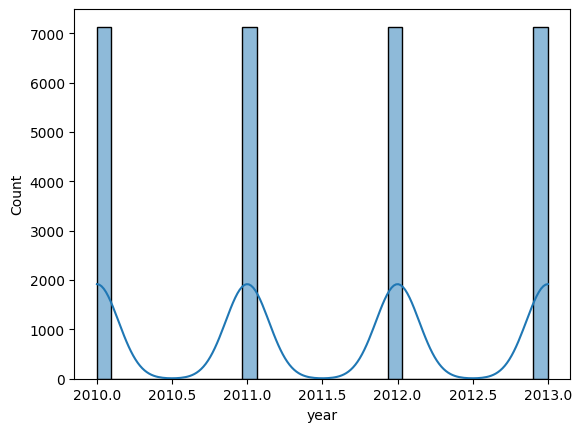

In [46]:
sns.histplot(df_balanced["year"],kde=True)

# Advanced EDA

<h3>clustering analysis</h3>

In [47]:
df.shape

(28551, 21)

In [48]:
# label encoding categorical columns
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df_encoded = df.copy()
for i in catnames:
    df_encoded[i] = le.fit_transform(df[i])

In [49]:
df_encoded

id  gender  masterCategory  subCategory  articleType  baseColour  \
0       8493       4               1            2           46           1   
1      30757       2               1           10           23          13   
2      14881       4               0            0           17           1   
3      48449       2               1           10           63           2   
4      12868       2               2            8           16           1   
...      ...     ...             ...          ...          ...         ...   
28546  54078       2               2            8           48          29   
28547  13183       2               2            8           48          42   
28548  10264       2               2            8           16           1   
28549  45378       4               2            8           14           1   
28550   5864       3               2            8            7          25   

       season    year  usage  \
0           0  2011.0      0   
1           2  2012.0      1   
2           2  2011.0      0   
3           2  2012.0      0   
4           1  2012.0      2   
...       ...     ...    ...   
28546       2  2012.0      5   
28547       0  2011.0      5   
28548       2  2013.0      2   
28549       2  2012.0      0   
28550       3  2011.0      0   

                                      productDisplayName  ...  \
0                         Forever New Women Black Skirts  ...   
1                     Fabindia Men Grey Mangalgiri Kurta  ...   
2      United Colors of Benetton Women Solid Black Ha...  ...   
3                     French Connection Men Blue T-shirt  ...   
4                      Lee Cooper Men Formal Black Shoes  ...   
...                                                  ...  ...   
28546    ADIDAS Men Orange F50 Adizero HG Football Shoes  ...   
28547                 Fila Men Dls 96 White Sports Shoes  ...   
28548    Clarks Men Goya Band Leather Black Formal Shoes  ...   
28549                          Rocia Women Black Sandals  ...   
28550  Converse Chuck Taylor All Star Unisex Navy Blu...  ...   

                                                    link ratings  \
0      http://assets.myntassets.com/v1/images/style/p...       5   
1      http://assets.myntassets.com/v1/images/style/p...       4   
2      http://assets.myntassets.com/v1/images/style/p...       3   
3      http://assets.myntassets.com/v1/images/style/p...       5   
4      http://assets.myntassets.com/v1/images/style/p...       3   
...                                                  ...     ...   
28546  http://assets.myntassets.com/v1/images/style/p...       5   
28547  http://assets.myntassets.com/v1/images/style/p...       5   
28548  http://assets.myntassets.com/v1/images/style/p...       5   
28549  http://assets.myntassets.com/v1/images/style/p...       5   
28550  http://assets.myntassets.com/v1/images/style/p...       2   

                                                  review Month  Price (USD)  \
0      Amazing quality! Definitely recommend. Would r...     9           46   
1                  Perfect for any occasion, great buy..    11           29   
2                           It's okay, nothing special.!    10           39   
3      Comfortable and stylish, worth the price. and ...     1           39   
4      Satisfactory for the price. for special occasi...     1           24   
...                                                  ...   ...          ...   
28546  Exceeded expectations, love the fit! but could...    11           41   
28547  Perfect for any occasion, great buy. and I'm v...     4           53   
28548              Exceeded expectations, love the fit!.     9           43   
28549  High quality fabric, very satisfied. and I'm v...     9           48   
28550            Not as described, low-quality product.!     3           13   

       user_id1  user_id2  user_id3  user_id4  user_id5  
0         93810     67912     12506     31747     17972  
1         24592     54541

In [50]:
# scaling the columns
features_to_be_scaled = ['gender', 'masterCategory', 'subCategory', 'articleType',
    'baseColour', 'season', 'ratings', 'Price (USD)', 'Month', 'year','usage']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features_to_be_scaled])

In [51]:
df_scaled

array([[ 1.16326346, -0.16326884, -1.79172866, ...,  1.00974801,
        -0.89061529, -0.51892601],
       [-0.69998114, -0.16326884,  0.65888518, ...,  1.5890629 ,
         0.74493865,  0.08280644],
       [ 1.16326346, -1.78240348, -2.40438213, ...,  1.29940545,
        -0.89061529, -0.51892601],
       ...,
       [-0.69998114,  1.4558658 ,  0.04623172, ...,  1.00974801,
         2.3804926 ,  0.68453889],
       [ 1.16326346,  1.4558658 ,  0.04623172, ...,  1.00974801,
         0.74493865, -0.51892601],
       [ 0.23164116,  1.4558658 ,  0.04623172, ..., -0.72819664,
        -0.89061529, -0.51892601]])

In [52]:
# applying pca for dimanesionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

In [53]:
# elbow method to decide clusters for k-means clustering analysis
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

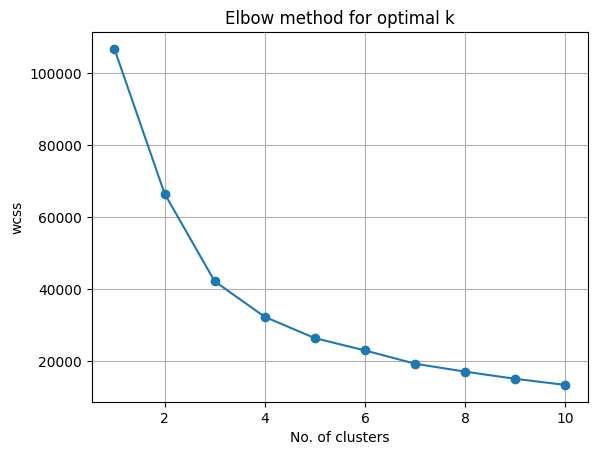

In [54]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.title("Elbow method for optimal k")
plt.grid(True)
plt.show()

In [55]:
df_pca = pd.DataFrame(pca_result,columns=['pca1','pca2'])
df_pca

pca1      pca2
0     -0.429872  1.532470
1     -0.436964 -0.014366
2     -2.464212  0.116658
3      0.264773  1.068773
4     -0.197315 -0.542015
...         ...       ...
28546  0.943306  1.384033
28547  2.547851  1.992272
28548 -1.120116  1.742129
28549 -1.313849  1.894369
28550 -0.851451 -1.934678

[28551 rows x 2 columns]

In [56]:
kmeans = KMeans(n_clusters=3,random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)
df_pca

pca1      pca2  cluster
0     -0.429872  1.532470        0
1     -0.436964 -0.014366        1
2     -2.464212  0.116658        1
3      0.264773  1.068773        0
4     -0.197315 -0.542015        2
...         ...       ...      ...
28546  0.943306  1.384033        0
28547  2.547851  1.992272        0
28548 -1.120116  1.742129        1
28549 -1.313849  1.894369        1
28550 -0.851451 -1.934678        2

[28551 rows x 3 columns]

In [57]:
df_pca.isnull().sum()

pca1       0
pca2       0
cluster    0
dtype: int64

In [58]:
df.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

# Now you can safely add the cluster column
df['cluster'] = df_pca['cluster']

In [59]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
user_id1              0
user_id2              0
user_id3              0
user_id4              0
user_id5              0
cluster               0
dtype: int64

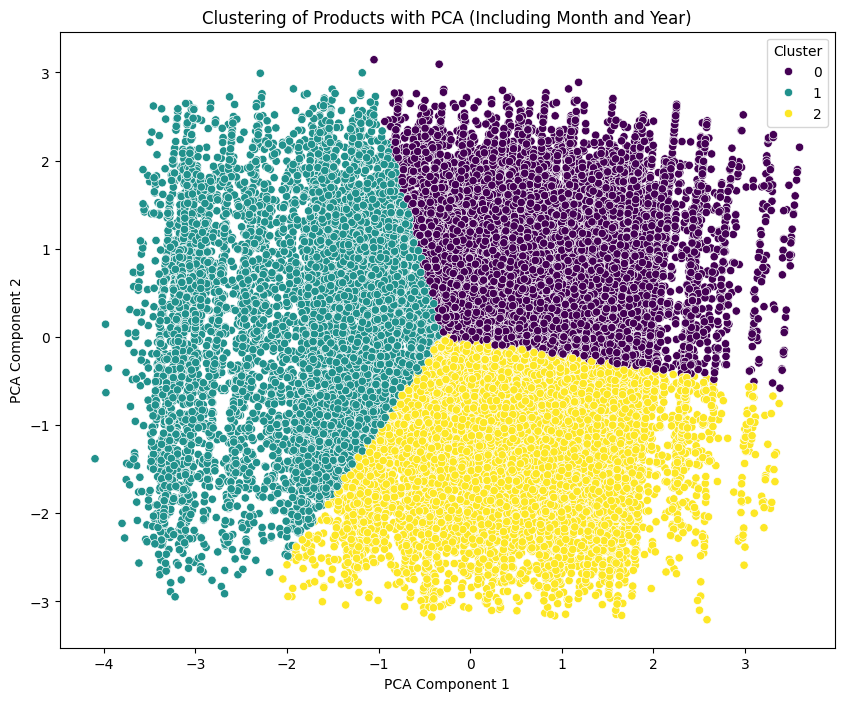

In [60]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca,
    x='pca1', y='pca2',
    hue='cluster',
    palette='viridis'
)
plt.title('Clustering of Products with PCA (Including Month and Year)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [61]:
df.shape

(28551, 22)

***image processing***

In [63]:
import tensorflow as tf
import os

In [64]:
# from google.colab import drive
# drive.mount('/content/drive')

In [65]:
# Image processing parameters
IMAGE_SIZE = (60, 80)
BATCH_SIZE = 32

In [66]:
image_folder = r'/content/drive/MyDrive/images'

In [67]:
# Create a list of full image paths from the CSV
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [68]:
import os
path_not_exists = []
for path in image_paths:
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
        path_not_exists.append(path[30:])

File does not exist: /content/drive/MyDrive/images/8493.jpg
File does not exist: /content/drive/MyDrive/images/39425.jpg
File does not exist: /content/drive/MyDrive/images/12347.jpg


In [69]:
for i in path_not_exists:
    df = df[df['filename'] != i]
df

id  gender masterCategory subCategory   articleType baseColour  \
1      30757     Men        Apparel     Topwear        Kurtas       Grey   
2      14881   Women    Accessories        Bags      Handbags      Black   
3      48449     Men        Apparel     Topwear       Tshirts       Blue   
4      12868     Men       Footwear       Shoes  Formal Shoes      Black   
5      17968     Men       Footwear  Flip Flops    Flip Flops      Black   
...      ...     ...            ...         ...           ...        ...   
28546  54078     Men       Footwear       Shoes  Sports Shoes     Orange   
28547  13183     Men       Footwear       Shoes  Sports Shoes      White   
28548  10264     Men       Footwear       Shoes  Formal Shoes      Black   
28549  45378   Women       Footwear       Shoes         Flats      Black   
28550   5864  Unisex       Footwear       Shoes  Casual Shoes  Navy Blue   

       season    year   usage  \
1      Summer  2012.0  Ethnic   
2      Summer  2011.0  Casual   
3      Summer  2012.0  Casual   
4      Spring  2012.0  Formal   
5        Fall  2011.0  Casual   
...       ...     ...     ...   
28546  Summer  2012.0  Sports   
28547    Fall  2011.0  Sports   
28548  Summer  2013.0  Formal   
28549  Summer  2012.0  Casual   
28550  Winter  2011.0  Casual   

                                      productDisplayName  ... ratings  \
1                     Fabindia Men Grey Mangalgiri Kurta  ...       4   
2      United Colors of Benetton Women Solid Black Ha...  ...       3   
3                     French Connection Men Blue T-shirt  ...       5   
4                      Lee Cooper Men Formal Black Shoes  ...       3   
5                          Puma Men Splash Black Slipper  ...       4   
...                                                  ...  ...     ...   
28546    ADIDAS Men Orange F50 Adizero HG Football Shoes  ...       5   
28547                 Fila Men Dls 96 White Sports Shoes  ...       5   
28548    Clarks Men Goya Band Leather Black Formal Shoes  ...       5   
28549                          Rocia Women Black Sandals  ...       5   
28550  Converse Chuck Taylor All Star Unisex Navy Blu...  ...       2   

                                                  review      Month  \
1                  Perfect for any occasion, great buy..  September   
2                           It's okay, nothing special.!    October   
3      Comfortable and stylish, worth the price. and ...     August   
4      Satisfactory for the price. for special occasi...     August   
5                  Exceeded expectations, love the fit!!       July   
...                                                  ...        ...   
28546  Exceeded expectations, love the fit! but could...  September   
28547  Perfect for any occasion, great buy. and I'm v...    January   
28548              Exceeded expectations, love the fit!.   November   
28549  High quality fabric, very satisfied. and I'm v...   November   
28550            Not as described, low-quality product.!   February   

      Price (USD) user_id1  user_id2  user_id3  user_id4  user_id5  cluster  
1              29    24592     54541     98358     62538     23573        1  
2              39    13278     34966     71797     93928     90931        1  
3              39    46048     40972     76426     52622     68556        0  
4              24    28289     90090     72873     61177     73624        2  
5              50    23434     12061     28242     36422     98098        0  
...           ...      ...       ...       ...       ...       ...      ...  
28546          41    73318     82710     73614     14278     90599        0  
28547          53    18851     57526     17113     37742     78084        0  
28548          43    55457     43386     59174     92447     86418        1  
28549          48    40311     89887     99381     99037     40828        1  
28550          13    85631     53911     57235     56254     45003        2  

[28548 rows x 22 columns]

In [70]:
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [71]:
print(f"Number of valid paths: {len(image_paths)}")

Number of valid paths: 28548


In [72]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.io.read_file(path)  # Read the image file
    img = tf.image.decode_jpeg(img, channels=3)  # Decode the JPEG image
    img = tf.image.resize(img, IMAGE_SIZE)  # Resize the image to target size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

In [73]:
# Create a TensorFlow dataset from image paths
dataset = tf.data.Dataset.from_tensor_slices(image_paths)  # Create dataset from image paths
dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)  # Load and preprocess images
dataset = dataset.batch(BATCH_SIZE)  # Batch the dataset
dataset = dataset.prefetch(tf.data.AUTOTUNE)  # Optimize loading performance

In [74]:
for images_batch in dataset.take(1):
    print(f"Batch shape: {images_batch.shape}")

Batch shape: (32, 60, 80, 3)


In [75]:
# Number of images
num_images = len(image_paths)

# Number of batches
num_batches = num_images // BATCH_SIZE + int(num_images % BATCH_SIZE != 0)  # Add 1 if there's a remainder
print(f"Total number of batches: {num_batches}")

Total number of batches: 893


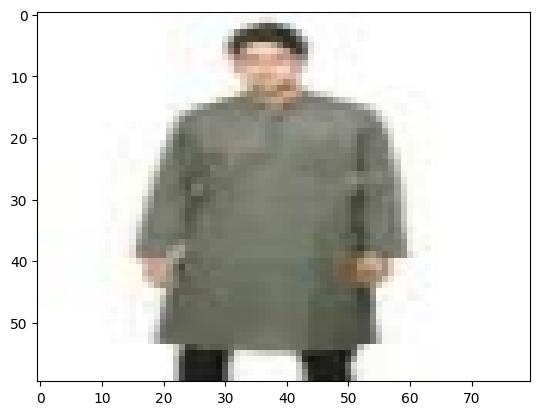

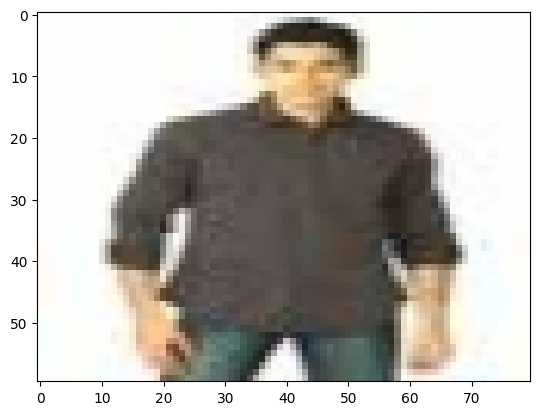

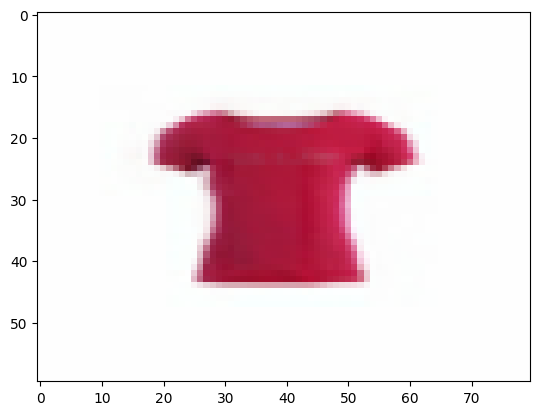

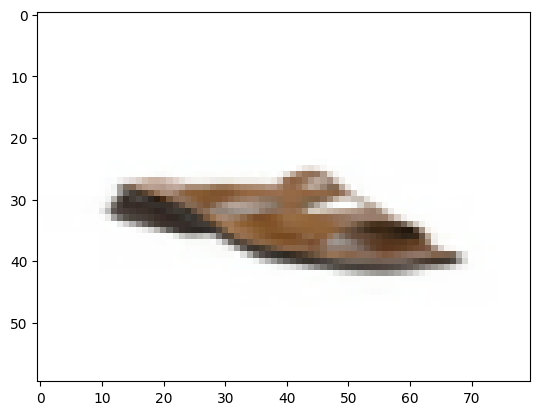

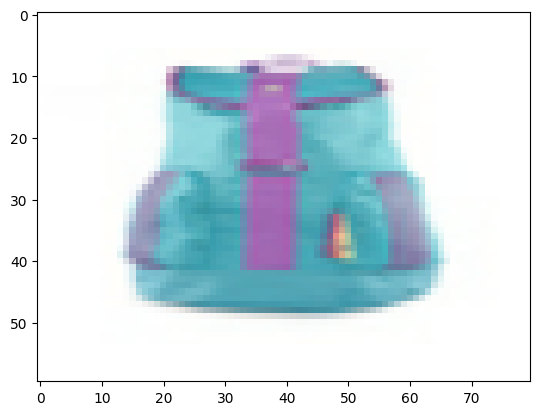

In [76]:
for images_batch in dataset.take(5):
    plt.imshow(images_batch[0])
    plt.show()

# ***Content-based filtering***

In [62]:
df

id  gender masterCategory subCategory   articleType baseColour  \
0       8493   Women        Apparel  Bottomwear        Skirts      Black   
1      30757     Men        Apparel     Topwear        Kurtas       Grey   
2      14881   Women    Accessories        Bags      Handbags      Black   
3      48449     Men        Apparel     Topwear       Tshirts       Blue   
4      12868     Men       Footwear       Shoes  Formal Shoes      Black   
...      ...     ...            ...         ...           ...        ...   
28546  54078     Men       Footwear       Shoes  Sports Shoes     Orange   
28547  13183     Men       Footwear       Shoes  Sports Shoes      White   
28548  10264     Men       Footwear       Shoes  Formal Shoes      Black   
28549  45378   Women       Footwear       Shoes         Flats      Black   
28550   5864  Unisex       Footwear       Shoes  Casual Shoes  Navy Blue   

       season    year   usage  \
0        Fall  2011.0  Casual   
1      Summer  2012.0  Ethnic   
2      Summer  2011.0  Casual   
3      Summer  2012.0  Casual   
4      Spring  2012.0  Formal   
...       ...     ...     ...   
28546  Summer  2012.0  Sports   
28547    Fall  2011.0  Sports   
28548  Summer  2013.0  Formal   
28549  Summer  2012.0  Casual   
28550  Winter  2011.0  Casual   

                                      productDisplayName  ... ratings  \
0                         Forever New Women Black Skirts  ...       5   
1                     Fabindia Men Grey Mangalgiri Kurta  ...       4   
2      United Colors of Benetton Women Solid Black Ha...  ...       3   
3                     French Connection Men Blue T-shirt  ...       5   
4                      Lee Cooper Men Formal Black Shoes  ...       3   
...                                                  ...  ...     ...   
28546    ADIDAS Men Orange F50 Adizero HG Football Shoes  ...       5   
28547                 Fila Men Dls 96 White Sports Shoes  ...       5   
28548    Clarks Men Goya Band Leather Black Formal Shoes  ...       5   
28549                          Rocia Women Black Sandals  ...       5   
28550  Converse Chuck Taylor All Star Unisex Navy Blu...  ...       2   

                                                  review      Month  \
0      Amazing quality! Definitely recommend. Would r...   November   
1                  Perfect for any occasion, great buy..  September   
2                           It's okay, nothing special.!    October   
3      Comfortable and stylish, worth the price. and ...     August   
4      Satisfactory for the price. for special occasi...     August   
...                                                  ...        ...   
28546  Exceeded expectations, love the fit! but could...  September   
28547  Perfect for any occasion, great buy. and I'm v...    January   
28548              Exceeded expectations, love the fit!.   November   
28549  High quality fabric, very satisfied. and I'm v...   November   
28550            Not as described, low-quality product.!   February   

      Price (USD) user_id1  user_id2  user_id3  user_id4  user_id5  cluster  
0              46    93810     67912     12506     31747     17972        0  
1              29    24592     54541     98358     62538     23573        1  
2              39    13278     34966     71797     93928     90931        1  
3              39    46048     40972     76426     52622     68556        0  
4              24    28289     90090     72873     61177     73624        2  
...           ...      ...       ...       ...       ...       ...      ...  
28546          41    73318     82710     73614     14278     90599        0  
28547          53    18851     57526     17113     37742     78084        0  
28548          43    55457     43386     59174     92447     86418        1  
28549          48    40311     89887     99381     99037     40828        1  
28550          13    85631     53911     57235     56254     45003        2  

[28551 rows x 22 columns]

In [63]:
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName',
       'filename', 'link', 'ratings', 'review', 'Month', 'Price (USD)',
       'user_id1', 'user_id2', 'user_id3', 'user_id4', 'user_id5', 'cluster'],
      dtype='object')

In [64]:
numnames

['id', 'year', 'ratings', 'Price (USD)']

In [65]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
user_id1              0
user_id2              0
user_id3              0
user_id4              0
user_id5              0
cluster               0
dtype: int64

In [66]:
df_encoded = df.copy()
le_dict = {}

for col in catnames:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

print("Encoded DataFrame:")
print(df_encoded)

subcategory_mapping = {label: idx for label, idx in zip(le_dict['subCategory'].classes_, le_dict['subCategory'].transform(le_dict['subCategory'].classes_))}
decode_mapping = {idx: label for idx, label in zip(le_dict['subCategory'].transform(le_dict['subCategory'].classes_),le_dict['subCategory'].classes_)}
masterCategory_mapping = {label: idx for label, idx in zip(le_dict['masterCategory'].classes_, le_dict['masterCategory'].transform(le_dict['masterCategory'].classes_))}
gender_mapping = {label: idx for label, idx in zip(le_dict['gender'].classes_, le_dict['gender'].transform(le_dict['gender'].classes_))}
colour_mapping = {label: idx for label, idx in zip(le_dict['baseColour'].classes_, le_dict['baseColour'].transform(le_dict['baseColour'].classes_))}

print("Subcategory Mapping (Original to Encoded):", subcategory_mapping)
print("Decoded Subcategory Mapping (Encoded to Original):", decode_mapping)
print("Master Category Mapping (Original to Encoded):", masterCategory_mapping)
print("Gender Mapping (Original to Encoded):", gender_mapping)
print("Colour Mapping (Original to Encoded):", colour_mapping)

Encoded DataFrame:
          id  gender  masterCategory  subCategory  articleType  baseColour  \
0       8493       4               1            2           46           1   
1      30757       2               1           10           23          13   
2      14881       4               0            0           17           1   
3      48449       2               1           10           63           2   
4      12868       2               2            8           16           1   
...      ...     ...             ...          ...          ...         ...   
28546  54078       2               2            8           48          29   
28547  13183       2               2            8           48          42   
28548  10264       2               2            8           16           1   
28549  45378       4               2            8           14           1   
28550   5864       3               2            8            7          25   

       season    year  usage  \
0           

In [67]:
df_encoded.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df_encoded['cluster'] = df['cluster']
df_encoded

id  gender  masterCategory  subCategory  articleType  baseColour  \
0       8493       4               1            2           46           1   
1      30757       2               1           10           23          13   
2      14881       4               0            0           17           1   
3      48449       2               1           10           63           2   
4      12868       2               2            8           16           1   
...      ...     ...             ...          ...          ...         ...   
28546  54078       2               2            8           48          29   
28547  13183       2               2            8           48          42   
28548  10264       2               2            8           16           1   
28549  45378       4               2            8           14           1   
28550   5864       3               2            8            7          25   

       season    year  usage  \
0           0  2011.0      0   
1           2  2012.0      1   
2           2  2011.0      0   
3           2  2012.0      0   
4           1  2012.0      2   
...       ...     ...    ...   
28546       2  2012.0      5   
28547       0  2011.0      5   
28548       2  2013.0      2   
28549       2  2012.0      0   
28550       3  2011.0      0   

                                      productDisplayName  ... ratings  \
0                         Forever New Women Black Skirts  ...       5   
1                     Fabindia Men Grey Mangalgiri Kurta  ...       4   
2      United Colors of Benetton Women Solid Black Ha...  ...       3   
3                     French Connection Men Blue T-shirt  ...       5   
4                      Lee Cooper Men Formal Black Shoes  ...       3   
...                                                  ...  ...     ...   
28546    ADIDAS Men Orange F50 Adizero HG Football Shoes  ...       5   
28547                 Fila Men Dls 96 White Sports Shoes  ...       5   
28548    Clarks Men Goya Band Leather Black Formal Shoes  ...       5   
28549                          Rocia Women Black Sandals  ...       5   
28550  Converse Chuck Taylor All Star Unisex Navy Blu...  ...       2   

                                                  review  Month Price (USD)  \
0      Amazing quality! Definitely recommend. Would r...      9          46   
1                  Perfect for any occasion, great buy..     11          29   
2                           It's okay, nothing special.!     10          39   
3      Comfortable and stylish, worth the price. and ...      1          39   
4      Satisfactory for the price. for special occasi...      1          24   
...                                                  ...    ...         ...   
28546  Exceeded expectations, love the fit! but could...     11          41   
28547  Perfect for any occasion, great buy. and I'm v...      4          53   
28548              Exceeded expectations, love the fit!.      9          43   
28549  High quality fabric, very satisfied. and I'm v...      9          48   
28550            Not as described, low-quality product.!      3          13   

       user_id1  user_id2  user_id3  user_id4  user_id5  cluster  
0         93810     67912     12506     31747     17972        0  
1         24592     54541     98358     62538     23573        1  
2         13278     34966     71797     93928     90931        1  
3         46048     40972     76426     52622     68556        0  
4         28289     90090     72873     61177     73624        2  
...         ...       ...       ...       ...       ...      ...  
28546     73318     82710     73614     14278     90599        0  
28547     18851     57526     17113     37742     78084        0  
28548     55457     43386     59174     92447     86418        1  
28549     40311     89887     99381     99037     40828        1  
28550     85631     53911     57235     56254     45003        2  

[28551 rows x 22 columns]

In [68]:
df_encoded.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
user_id1              0
user_id2              0
user_id3              0
user_id4              0
user_id5              0
cluster               0
dtype: int64

In [69]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[['ratings', 'Price (USD)','year']])
scaled_df = pd.DataFrame(scaled_features, columns=['ratings', 'Price (USD)','year'])

processed_dataset = pd.concat([df_encoded[['id', 'gender', 'masterCategory', 'subCategory', 'articleType','baseColour', 'season', 'usage', 'productDisplayName', 'Month','cluster']],scaled_df], axis=1)
processed_dataset

id  gender  masterCategory  subCategory  articleType  baseColour  \
0       8493       4               1            2           46           1   
1      30757       2               1           10           23          13   
2      14881       4               0            0           17           1   
3      48449       2               1           10           63           2   
4      12868       2               2            8           16           1   
...      ...     ...             ...          ...          ...         ...   
28546  54078       2               2            8           48          29   
28547  13183       2               2            8           48          42   
28548  10264       2               2            8           16           1   
28549  45378       4               2            8           14           1   
28550   5864       3               2            8            7          25   

       season  usage                                 productDisplayName  \
0           0      0                     Forever New Women Black Skirts   
1           2      1                 Fabindia Men Grey Mangalgiri Kurta   
2           2      0  United Colors of Benetton Women Solid Black Ha...   
3           2      0                 French Connection Men Blue T-shirt   
4           1      2                  Lee Cooper Men Formal Black Shoes   
...       ...    ...                                                ...   
28546       2      5    ADIDAS Men Orange F50 Adizero HG Football Shoes   
28547       0      5                 Fila Men Dls 96 White Sports Shoes   
28548       2      2    Clarks Men Goya Band Leather Black Formal Shoes   
28549       2      0                          Rocia Women Black Sandals   
28550       3      0  Converse Chuck Taylor All Star Unisex Navy Blu...   

       Month  cluster   ratings  Price (USD)      year  
0          9        0  1.096569     1.078573 -0.890615  
1         11        1  0.315506    -0.423844  0.744939  
2         10        1 -0.465558     0.459931 -0.890615  
3          1        0  1.096569     0.459931  0.744939  
4          1        2 -0.465558    -0.865732  0.744939  
...      ...      ...       ...          ...       ...  
28546     11        0  1.096569     0.636686  0.744939  
28547      4        0  1.096569     1.697216 -0.890615  
28548      9        1  1.096569     0.813441  2.380493  
28549      9        1  1.096569     1.255328  0.744939  
28550      3        2 -1.246621    -1.837884 -0.890615  

[28551 rows x 14 columns]

In [70]:
# subset_size = 2000
# df_sample = df.sample(n=subset_size, random_state=42)
# df_sample.reset_index(drop=True, inplace=True)
# df_sample

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split

processed_dataset['combined_features'] = processed_dataset[['gender', 'baseColour', 'masterCategory',
                                             'subCategory', 'articleType', 'year',
                                             'Month', 'ratings', 'season',
                                             'usage', 'Price (USD)', 'productDisplayName']].astype(str).agg(' '.join, axis=1)

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_dataset['combined_features'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [73]:
# from sklearn.metrics.pairwise import cosine_similarity

# similarity_matrices = {}
# for cluster_id in range(3):
#     cluster_items = processed_dataset[processed_dataset['cluster'] == cluster_id]
#     cluster_tfidf = tfidf_matrix[cluster_items.index]

#     similarity_matrix = cosine_similarity(cluster_tfidf)
#     similarity_matrices[cluster_id] = similarity_matrix

In [74]:
complementary_map = {
    'Topwear': ['Bottomwear', 'Flip Flops','Shoes', 'Jewellery', 'Eyewear', 'Belts', 'Bags', 'Watches', 'Wallets'],
    'Bottomwear': ['Topwear', 'Shoes', 'Flip Flops', 'Bags', 'Belts', 'Watches', 'Wallets'],
    'Bags': ['Topwear', 'Bottomwear', 'Shoes', 'Watches', 'Jewellery', 'Eyewear'],
    'Watches': ['Topwear', 'Bottomwear', 'Bags', 'Shoes', 'Jewellery'],
    'Shoes': ['Topwear', 'Bottomwear', 'Socks', 'Eyewear', 'Belts'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Socks', 'Belts', 'Eyewear'],
    'Jewellery': ['Topwear', 'Bottomwear', 'Saree', 'Watches', 'Eyewear'],
    'Eyewear': ['Topwear', 'Bottomwear', 'Shoes', 'Jewellery'],
    'Belts': ['Topwear', 'Bottomwear', 'Shoes', 'Flip Flops', 'Watches'],
    'Saree': ['Jewellery', 'Bags', 'Flip Flops','Shoes'],
    'Loungewear and Nightwear': ['Bottomwear', 'Socks'],
    'Wallets': ['Topwear', 'Bottomwear', 'Bags', 'Watches'],
    'Socks': ['Shoes', 'Flip Flops', 'Loungewear and Nightwear']
}

encoded_complementary_map = {
    subcategory_mapping[original]: [subcategory_mapping[comp] for comp in complements if comp in subcategory_mapping]
    for original, complements in complementary_map.items() if original in subcategory_mapping
}

print("Encoded Complementary Map:", encoded_complementary_map)


Encoded Complementary Map: {10: [2, 4, 8, 5, 3, 1, 0, 12, 11], 2: [10, 8, 4, 0, 1, 12, 11], 0: [10, 2, 8, 12, 5, 3], 12: [10, 2, 0, 8, 5], 8: [10, 2, 9, 3, 1], 4: [10, 2, 9, 1, 3], 5: [10, 2, 7, 12, 3], 3: [10, 2, 8, 5], 1: [10, 2, 8, 4, 12], 7: [5, 0, 4, 8], 6: [2, 9], 11: [10, 2, 0, 12], 9: [8, 4, 6]}


In [75]:
df['subCategory'].unique()

array(['Bottomwear', 'Topwear', 'Bags', 'Shoes', 'Flip Flops',
       'Jewellery', 'Belts', 'Saree', 'Wallets', 'Socks', 'Watches',
       'Loungewear and Nightwear', 'Eyewear'], dtype=object)

In [76]:
subcategory_mapping

{'Bags': 0,
 'Belts': 1,
 'Bottomwear': 2,
 'Eyewear': 3,
 'Flip Flops': 4,
 'Jewellery': 5,
 'Loungewear and Nightwear': 6,
 'Saree': 7,
 'Shoes': 8,
 'Socks': 9,
 'Topwear': 10,
 'Wallets': 11,
 'Watches': 12}

In [77]:
processed_dataset[processed_dataset.subCategory==7].id

43       57964
78       53044
87       34981
106      59598
132      49927
         ...  
28163    50910
28240    59670
28279    49928
28360    59667
28369    59614
Name: id, Length: 426, dtype: int64

In [78]:
colour_contrast_map = {
    'Black': ['White', 'Grey', 'Beige', 'Silver', 'Cream'],
    'Grey': ['Black', 'White', 'Red', 'Navy Blue'],
    'Blue': ['White', 'Cream', 'Yellow', 'Pink', 'Silver'],
    'Pink': ['Navy Blue', 'White', 'Beige', 'Grey'],
    'Brown': ['Cream', 'White', 'Beige', 'Olive', 'Mustard'],
    'Cream': ['Black', 'Blue', 'Brown', 'Navy Blue', 'Purple'],
    'Green': ['White', 'Black', 'Navy Blue', 'Yellow', 'Brown'],
    'White': ['Black', 'Blue', 'Red', 'Navy Blue', 'Grey'],
    'Navy Blue': ['White', 'Yellow', 'Cream', 'Pink', 'Beige'],
    'Yellow': ['Black', 'Navy Blue', 'Grey', 'Green', 'Purple'],
    'Silver': ['Black', 'Blue', 'Pink', 'Red'],
    'Red': ['White', 'Black', 'Grey', 'Beige'],
    'Beige': ['Navy Blue', 'Black', 'Red', 'Olive', 'Cream'],
    'Maroon': ['Cream', 'Beige', 'White', 'Olive'],
    'Gold': ['Black', 'White', 'Cream', 'Navy Blue'],
    'Magenta': ['White', 'Navy Blue', 'Cream'],
    'Lavender': ['Navy Blue', 'White', 'Grey'],
    'Multi': ['White', 'Black'],
    'Purple': ['Yellow', 'White', 'Cream'],
    'Charcoal': ['White', 'Cream', 'Blue'],
    'Orange': ['White', 'Black', 'Navy Blue'],
    'Tan': ['Navy Blue', 'White', 'Black'],
    'Olive': ['White', 'Yellow', 'Cream', 'Tan'],
    'Off White': ['Black', 'Grey', 'Navy Blue'],
    'Grey Melange': ['Black', 'White', 'Red', 'Blue'],
    'Rust': ['White', 'Cream', 'Beige', 'Navy Blue'],
    'Turquoise Blue': ['White', 'Black', 'Yellow'],
    'Mustard': ['White', 'Black', 'Brown', 'Navy Blue'],
    'Khaki': ['White', 'Navy Blue', 'Brown'],
    'Lime Green': ['White', 'Black', 'Grey'],
    'Peach': ['Blue', 'Black', 'Navy Blue'],
    'Sea Green': ['White', 'Black', 'Navy Blue'],
    'Teal': ['White', 'Cream', 'Navy Blue'],
    'Mauve': ['White', 'Grey', 'Blue'],
    'Copper': ['White', 'Black', 'Navy Blue'],
    'Steel': ['Black', 'White', 'Beige'],
    'Bronze': ['White', 'Black'],
    'Nude': ['White', 'Black', 'Beige'],
    'Metallic': ['White', 'Black', 'Silver'],
    'Taupe': ['White', 'Black', 'Beige'],
    'Fluorescent Green': ['White', 'Black'],
    'Burgundy': ['White', 'Beige', 'Grey'],
    'Mushroom Brown': ['White', 'Grey', 'Black'],
    'Coffee Brown': ['White', 'Beige', 'Cream']
}

encoded_complementary_colour_map = {
    colour_mapping[original]: [colour_mapping[comp] for comp in complements if comp in colour_mapping]
    for original, complements in colour_contrast_map.items() if original in colour_mapping
}

print("Encoded Complementary Color Map:", encoded_complementary_colour_map)

Encoded Complementary Color Map: {1: [42, 13, 0, 36, 9], 13: [1, 42, 33, 25], 2: [42, 9, 43, 31, 36], 31: [25, 42, 0, 13], 4: [9, 42, 0, 28, 24], 9: [1, 2, 4, 25, 32], 12: [42, 1, 25, 43, 4], 42: [1, 2, 33, 25, 13], 25: [42, 43, 9, 31, 0], 43: [1, 25, 13, 12, 32], 36: [1, 2, 31, 33], 33: [42, 1, 13, 0], 0: [25, 1, 33, 28, 9], 19: [9, 0, 42, 28], 11: [1, 42, 9, 25], 18: [42, 25, 9], 16: [25, 42, 13], 22: [42, 1], 32: [43, 42, 9], 6: [42, 9, 2], 29: [42, 1, 25], 38: [25, 42, 1], 28: [42, 43, 9, 38], 27: [1, 13, 25], 14: [1, 42, 33, 2], 34: [42, 9, 0, 25], 41: [42, 1, 43], 24: [42, 1, 4, 25], 15: [42, 25, 4], 17: [42, 1, 13], 30: [2, 1, 25], 35: [42, 1, 25], 40: [42, 9, 25], 20: [42, 13, 2], 8: [42, 1, 25], 37: [1, 42, 0], 3: [42, 1], 26: [42, 1, 0], 21: [42, 1, 36], 39: [42, 1, 0], 10: [42, 1], 5: [42, 0, 13], 23: [42, 13, 1], 7: [42, 0, 9]}


In [79]:
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations(product_id, df_encoded, tfidf_matrix, encoded_complementary_map, encoded_complementary_colour_map):
    # Get the index and details of the target product
    try:
        product_index = df_encoded[df_encoded['id'] == product_id].index[0]
    except IndexError:
        print(f"Product ID {product_id} not found in the dataset")
        return []

    # Extract TF-IDF vector for the target product
    target_vector = tfidf_matrix[product_index]

    # Get target product's attributes
    encoded_subcategory = df_encoded.loc[product_index, 'subCategory']
    product_gender = df_encoded.loc[product_index, 'gender']
    encoded_colour = df_encoded.loc[product_index, 'baseColour']
    print(f"Product Index: {product_index}")
    print(f"Encoded Subcategory: {encoded_subcategory}, Gender: {product_gender}, Colour: {encoded_colour}")
    print(f"Subcategory: {decode_mapping[encoded_subcategory]}")

    # Initialize recommendations dictionary for unique items from each complementary subcategory
    recommendations = {}
    complementary_subcategories = encoded_complementary_map.get(encoded_subcategory, [])
    complementary_colours = encoded_complementary_colour_map.get(encoded_colour, [])
    footwear_selected = False  # Track if a footwear item has already been added

    for idx, row in df_encoded.iterrows():
        # Skip the target item itself
        if idx == product_index:
            continue

        # Compute similarity score with the target item
        item_vector = tfidf_matrix[idx]
        similarity_score = cosine_similarity(target_vector, item_vector.reshape(1, -1))[0][0]

        # Retrieve details of the current item
        recommended_subcategory = row['subCategory']
        recommended_master_category = row['masterCategory']
        recommended_colour = row['baseColour']

        # Check conditions for complementary subcategory, gender, color contrast, and footwear restriction
        if (recommended_subcategory in complementary_subcategories and
            row['gender'] == product_gender and
            recommended_colour in complementary_colours):

            # If the item belongs to 'Footwear', ensure only one item is selected
            if recommended_master_category == 2:
                if footwear_selected:
                    continue  # Skip if a footwear item is already added
                else:
                    footwear_selected = True  # Mark footwear as selected

            # Add or replace recommendation if this item has higher similarity
            if (recommended_subcategory not in recommendations or
                recommendations[recommended_subcategory][1] < similarity_score):

                recommendations[recommended_subcategory] = (row['id'], similarity_score)

            # Stop if all complementary subcategories are covered
            if len(recommendations) == len(complementary_subcategories):
                break

    # Collect the recommended product IDs
    recommended_product_ids = [item[0] for item in recommendations.values()]

    # Check if all complementary subcategories were covered
    if len(recommended_product_ids) < len(complementary_subcategories):
        print("Some complementary subcategories could not be found.")

    return recommended_product_ids


In [80]:
processed_dataset.id.sample(5)

2805     22722
9817     59592
22928     8995
21779    16027
27407    56916
Name: id, dtype: int64

In [81]:
subcategory_mapping

{'Bags': 0,
 'Belts': 1,
 'Bottomwear': 2,
 'Eyewear': 3,
 'Flip Flops': 4,
 'Jewellery': 5,
 'Loungewear and Nightwear': 6,
 'Saree': 7,
 'Shoes': 8,
 'Socks': 9,
 'Topwear': 10,
 'Wallets': 11,
 'Watches': 12}

In [82]:
gender_mapping

{'Boys': 0, 'Girls': 1, 'Men': 2, 'Unisex': 3, 'Women': 4}

In [83]:
df_encoded.head()

id  gender  masterCategory  subCategory  articleType  baseColour  \
0   8493       4               1            2           46           1   
1  30757       2               1           10           23          13   
2  14881       4               0            0           17           1   
3  48449       2               1           10           63           2   
4  12868       2               2            8           16           1   

   season    year  usage                                 productDisplayName  \
0       0  2011.0      0                     Forever New Women Black Skirts   
1       2  2012.0      1                 Fabindia Men Grey Mangalgiri Kurta   
2       2  2011.0      0  United Colors of Benetton Women Solid Black Ha...   
3       2  2012.0      0                 French Connection Men Blue T-shirt   
4       1  2012.0      2                  Lee Cooper Men Formal Black Shoes   

   ... ratings                                             review  Month  \
0  ...       5  Amazing quality! Definitely recommend. Would r...      9   
1  ...       4              Perfect for any occasion, great buy..     11   
2  ...       3                       It's okay, nothing special.!     10   
3  ...       5  Comfortable and stylish, worth the price. and ...      1   
4  ...       3  Satisfactory for the price. for special occasi...      1   

  Price (USD)  user_id1  user_id2  user_id3  user_id4  user_id5  cluster  
0          46     93810     67912     12506     31747     17972        0  
1          29     24592     54541     98358     62538     23573        1  
2          39     13278     34966     71797     93928     90931        1  
3          39     46048     40972     76426     52622     68556        0  
4          24     28289     90090     72873     61177     73624        2  

[5 rows x 22 columns]

In [84]:
processed_dataset.head()

id  gender  masterCategory  subCategory  articleType  baseColour  \
0   8493       4               1            2           46           1   
1  30757       2               1           10           23          13   
2  14881       4               0            0           17           1   
3  48449       2               1           10           63           2   
4  12868       2               2            8           16           1   

   season  usage                                 productDisplayName  Month  \
0       0      0                     Forever New Women Black Skirts      9   
1       2      1                 Fabindia Men Grey Mangalgiri Kurta     11   
2       2      0  United Colors of Benetton Women Solid Black Ha...     10   
3       2      0                 French Connection Men Blue T-shirt      1   
4       1      2                  Lee Cooper Men Formal Black Shoes      1   

   cluster   ratings  Price (USD)      year  \
0        0  1.096569     1.078573 -0.890615   
1        1  0.315506    -0.423844  0.744939   
2        1 -0.465558     0.459931 -0.890615   
3        0  1.096569     0.459931  0.744939   
4        2 -0.465558    -0.865732  0.744939   

                                   combined_features  
0  4 1 1 2 46 -0.8906152906981095 9 1.09656908794...  
1  2 13 1 10 23 0.7449386531319587 11 0.315505720...  
2  4 1 0 0 17 -0.8906152906981095 10 -0.465557647...  
3  2 2 1 10 63 0.7449386531319587 1 1.09656908794...  
4  2 1 2 8 16 0.7449386531319587 1 -0.46555764740...

In [85]:
product_id= 53044
recommended_products = get_recommendations(product_id,processed_dataset,tfidf_matrix,encoded_complementary_map,encoded_complementary_colour_map)
print("Recommended products:", recommended_products)

Product Index: 78
Encoded Subcategory: 7, Gender: 4, Colour: 22
Subcategory: Saree
Some complementary subcategories could not be found.
Recommended products: [53066, 43705, 45406]


In [101]:
from PIL import Image
path_images = []
image_url = "//content//drive//MyDrive//images//"
for i in recommended_products:
    path_images.append(image_url + df[df.id==i]['filename'].values[0])
path_images

['//content//drive//MyDrive//images//53066.jpg',
 '//content//drive//MyDrive//images//43705.jpg',
 '//content//drive//MyDrive//images//45406.jpg']

In [102]:
import cv2
import numpy as np
from PIL import Image

image_path = f'//content//drive//MyDrive//images//{product_id}.jpg'

pil_image = Image.open(image_path)
image_array = np.array(pil_image)
resized_image = cv2.resize(image_array, IMAGE_SIZE)

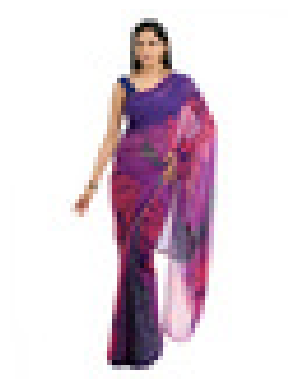

In [103]:
plt.imshow(resized_image)
plt.axis("off")
plt.show()

In [104]:
rec_images = []
for i in path_images:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images.append(resized_image)

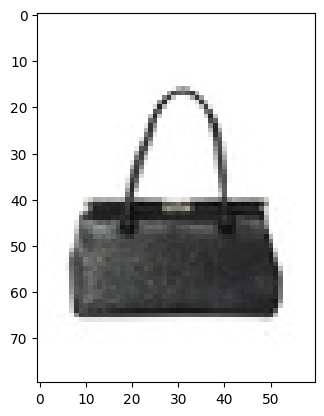

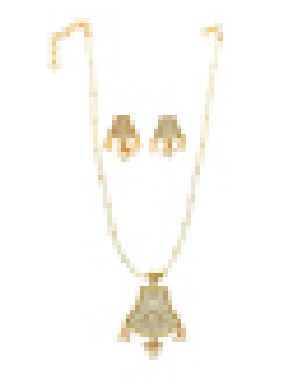

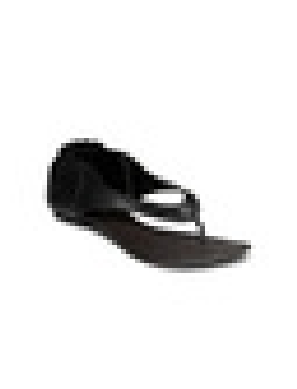

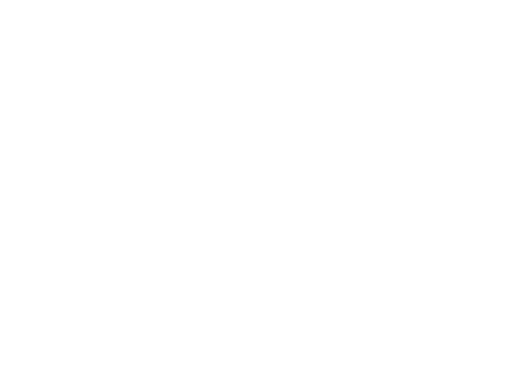

In [105]:
for i in rec_images:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

# **Collaborative Filtering**

In [86]:
df.reset_index(drop=True, inplace=True)
processed_dataset.reset_index(drop=True, inplace=True)

processed_dataset['user_id1'] = df['user_id1']
processed_dataset['user_id2'] = df['user_id2']
processed_dataset['user_id3'] = df['user_id3']
processed_dataset['user_id4'] = df['user_id4']
processed_dataset['user_id5'] = df['user_id5']
processed_dataset

id  gender  masterCategory  subCategory  articleType  baseColour  \
0       8493       4               1            2           46           1   
1      30757       2               1           10           23          13   
2      14881       4               0            0           17           1   
3      48449       2               1           10           63           2   
4      12868       2               2            8           16           1   
...      ...     ...             ...          ...          ...         ...   
28546  54078       2               2            8           48          29   
28547  13183       2               2            8           48          42   
28548  10264       2               2            8           16           1   
28549  45378       4               2            8           14           1   
28550   5864       3               2            8            7          25   

       season  usage                                 productDisplayName  \
0           0      0                     Forever New Women Black Skirts   
1           2      1                 Fabindia Men Grey Mangalgiri Kurta   
2           2      0  United Colors of Benetton Women Solid Black Ha...   
3           2      0                 French Connection Men Blue T-shirt   
4           1      2                  Lee Cooper Men Formal Black Shoes   
...       ...    ...                                                ...   
28546       2      5    ADIDAS Men Orange F50 Adizero HG Football Shoes   
28547       0      5                 Fila Men Dls 96 White Sports Shoes   
28548       2      2    Clarks Men Goya Band Leather Black Formal Shoes   
28549       2      0                          Rocia Women Black Sandals   
28550       3      0  Converse Chuck Taylor All Star Unisex Navy Blu...   

       Month  cluster   ratings  Price (USD)      year  \
0          9        0  1.096569     1.078573 -0.890615   
1         11        1  0.315506    -0.423844  0.744939   
2         10        1 -0.465558     0.459931 -0.890615   
3          1        0  1.096569     0.459931  0.744939   
4          1        2 -0.465558    -0.865732  0.744939   
...      ...      ...       ...          ...       ...   
28546     11        0  1.096569     0.636686  0.744939   
28547      4        0  1.096569     1.697216 -0.890615   
28548      9        1  1.096569     0.813441  2.380493   
28549      9        1  1.096569     1.255328  0.744939   
28550      3        2 -1.246621    -1.837884 -0.890615   

                                       combined_features  user_id1  user_id2  \
0      4 1 1 2 46 -0.8906152906981095 9 1.09656908794...     93810     67912   
1      2 13 1 10 23 0.7449386531319587 11 0.315505720...     24592     54541   
2      4 1 0 0 17 -0.8906152906981095 10 -0.465557647...     13278     34966   
3      2 2 1 10 63 0.7449386531319587 1 1.09656908794...     46048     40972   
4      2 1 2 8 16 0.7449386531319587 1 -0.46555764740...     28289     90090   
...                                                  ...       ...       ...   
28546  2 29 2 8 48 0.7449386531319587 11 1.0965690879...     73318     82710   
28547  2 42 2 8 48 -0.8906152906981095 4 1.0965690879...     18851     57526   
28548  2 1 2 8 16 2.3804925969620268 9 1.096569087941...     55457     43386   
28549  4 1 2 8 14 0.7449386531319587 9 1.096569087941...     40311     89887   
28550  3 25 2 8 7 -0.8906152906981095 3 -1.2466210150...     85631     53911   

       user_id3  user_id4  user_id5  
0         12506     31747     17972  
1         98358     62538     23573  
2         71797     93928     90931  
3         76426     52622     68556  
4         72873     61177     73624  
...         ...       ...       ...  
28546     73614     14278     90599  
28547     17113     37742     78084  
28548     59174     92447     86418  
28549     99381     99037     40828  
28550     57235     56254     45003  

[28551 rows x 20 columns]

In [87]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming the "id" column is the item ID, we need to 'melt' the dataset to create a user-item interaction table
user_columns = ['user_id1', 'user_id2', 'user_id3', 'user_id4', 'user_id5']
df_melted = df.melt(id_vars=['id', 'ratings'], value_vars=user_columns, var_name='user', value_name='user_id')

# Drop rows where there is no user interaction
df_melted.dropna(subset=['user_id'], inplace=True)

# Pivot to create a user-item matrix
user_item_matrix = df_melted.pivot_table(index='user_id', columns='id', values='ratings').fillna(0)

# Inspect the user-item matrix
print(user_item_matrix)


id       1163   1165   1525   1526   1528   1529   1530   1531   1532   1533   \
user_id                                                                         
10022      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10053      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10074      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10088      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10089      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
99952      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99957      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99974      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99989      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99995      0.0    0.0    0.0

In [88]:
# Compute cosine similarity between users
start_time = time.time()
with tf.device('/GPU:0'):
  user_similarity = cosine_similarity(user_item_matrix)

  # Create a DataFrame to store user similarity scores
  user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

  # Inspect user similarity matrix
  print(user_similarity_df)
end_time = time.time()

user_id  10022    10053  10074  10088  10089  10142     10150  10167  10191  \
user_id                                                                       
10022      1.0  0.00000    0.0    0.0    0.0    0.0  0.040444    0.0    0.0   
10053      0.0  1.00000    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
10074      0.0  0.00000    1.0    0.0    0.0    0.0  0.000000    0.0    0.0   
10088      0.0  0.00000    0.0    1.0    0.0    0.0  0.000000    0.0    0.0   
10089      0.0  0.00000    0.0    0.0    1.0    0.0  0.000000    0.0    0.0   
...        ...      ...    ...    ...    ...    ...       ...    ...    ...   
99952      0.0  0.00000    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
99957      0.0  0.00000    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
99974      0.0  0.03848    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
99989      0.0  0.00000    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
99995      0.0  0.00000    0.0    0.0    0.0    0.0 

In [151]:
complementary_map = {
    'Topwear': ['Bottomwear', 'Flip Flops','Shoes', 'Jewellery', 'Eyewear', 'Belts', 'Bags', 'Watches', 'Wallets'],
    'Bottomwear': ['Topwear', 'Shoes', 'Flip Flops', 'Bags', 'Belts', 'Watches', 'Wallets'],
    'Bags': ['Topwear', 'Bottomwear', 'Shoes', 'Watches', 'Jewellery', 'Eyewear'],
    'Watches': ['Topwear', 'Bottomwear', 'Bags', 'Shoes', 'Jewellery'],
    'Shoes': ['Topwear', 'Bottomwear', 'Socks', 'Eyewear', 'Belts'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Socks', 'Belts', 'Eyewear'],
    'Jewellery': ['Topwear', 'Bottomwear', 'Saree', 'Watches', 'Eyewear'],
    'Eyewear': ['Topwear', 'Bottomwear', 'Shoes', 'Jewellery'],
    'Belts': ['Topwear', 'Bottomwear', 'Shoes', 'Flip Flops', 'Watches'],
    'Saree': ['Jewellery', 'Bags', 'Flip Flops','Shoes'],
    'Loungewear and Nightwear': ['Bottomwear', 'Socks'],
    'Wallets': ['Topwear', 'Bottomwear', 'Bags', 'Watches'],
    'Socks': ['Shoes', 'Flip Flops', 'Loungewear and Nightwear']
}

encoded_complementary_map = {
    subcategory_mapping[original]: [subcategory_mapping[comp] for comp in complements if comp in subcategory_mapping]
    for original, complements in complementary_map.items() if original in subcategory_mapping
}

print("Encoded Complementary Map:", encoded_complementary_map)


Encoded Complementary Map: {10: [2, 4, 8, 5, 3, 1, 0, 12, 11], 2: [10, 8, 4, 0, 1, 12, 11], 0: [10, 2, 8, 12, 5, 3], 12: [10, 2, 0, 8, 5], 8: [10, 2, 9, 3, 1], 4: [10, 2, 9, 1, 3], 5: [10, 2, 7, 12, 3], 3: [10, 2, 8, 5], 1: [10, 2, 8, 4, 12], 7: [5, 0, 4, 8], 6: [2, 9], 11: [10, 2, 0, 12], 9: [8, 4, 6]}


In [90]:
processed_dataset[["user_id1","id"]].sample(5)

user_id1     id
7471      93459  33028
16228     17367  12920
19810     87194  26635
13443     64381  54520
11883     99714   9233

In [91]:
def recommend_outfit_items(user_id, target_item_id, df, user_item_matrix, user_similarity_df, complementary_map):
    # Ensure the user ID exists in the user_item_matrix
    if user_id not in user_item_matrix.index:
        print(f"User ID {user_id} not found in user interactions.")
        return []

    # Get the target item attributes
    target_item_row = df[df['id'] == target_item_id].iloc[0]
    target_subcategory = target_item_row['subCategory']
    target_gender = target_item_row['gender']
    target_usage = target_item_row['usage']

    # Debug: Check target item attributes
    # print(f"Target Item: {target_item_id}, Subcategory: {decode_mapping[target_subcategory]}, Gender: {target_gender}, Usage: {target_usage}")

    # Get complementary subcategories
    complementary_subcategories = complementary_map.get(target_subcategory, [])

    # Debug: Check complementary subcategories
    # print(f"Complementary Subcategories: {complementary_subcategories}")

    # Find similar users to the target user
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:6].tolist()

    # Debug: Check similar users
    # print(f"Similar Users: {similar_users}")

    # Collect items from similar users
    candidate_items = set()
    for similar_user in similar_users:
        similar_user_items = user_item_matrix.loc[similar_user]
        similar_user_interacted_items = similar_user_items[similar_user_items > 0].index.tolist()
        candidate_items.update(similar_user_interacted_items)

    # Filter candidate items based on complementary categories, same gender, and usage
    recommendations = []
    used_subcategories = set()  # Track which subcategories have been used
    best_footwear = None  # To track the best footwear based on similarity score
    best_footwear_score = -float('inf')  # Initialize with a very low score

    for item_id in candidate_items:
        item_row = df[df['id'] == item_id].iloc[0]

        # Ensure the item matches the complementary subcategory, gender, and usage
        if (item_row['subCategory'] in complementary_subcategories and
            item_row['gender'] == target_gender and
            item_row['usage'] == target_usage and
            item_row['subCategory'] not in used_subcategories):

            # If the item is footwear, track the similarity score to pick the best footwear
            if item_row['masterCategory'] == 2:  # Assuming 2 corresponds to footwear
                similarity_score = user_similarity_df[user_id].loc[similar_users].mean()  # Get the similarity score for this item
                if similarity_score > best_footwear_score:
                    best_footwear = item_row
                    best_footwear_score = similarity_score
            else:
                # Add the item to the recommendations
                recommendations.append(item_id)
                used_subcategories.add(item_row['subCategory'])  # Mark this subcategory as used

            # Stop if we have enough recommendations (5 items in total, one per subcategory)
            if len(recommendations) >= 5:
                break

    # If no footwear has been recommended, add the best footwear based on similarity score
    if best_footwear is not None:
        recommendations.append(best_footwear['id'])

    if recommendations is None:
        print("No recommendations found.")

    # if len(used_subcategories) < len(complementary_subcategories):
    #     print("Some complementary subcategories could not be found.")

    return recommendations

# Example usage
user_id = 19961
target_item_id = 17028  # Replace with an item ID
recommended_outfit_items = recommend_outfit_items(user_id, target_item_id, processed_dataset, user_item_matrix, user_similarity_df, encoded_complementary_map)

print("Recommended Outfit Items:", recommended_outfit_items)


Recommended Outfit Items: [13313, 21583, 50837, 18217]


In [92]:
path_images_1 = []
image_url = "//content//drive//MyDrive//images//"
for i in recommended_outfit_items:
  path_images_1.append(image_url + df[df.id==i]['filename'].values[0])
path_images_1

['//content//drive//MyDrive//images//13313.jpg',
 '//content//drive//MyDrive//images//21583.jpg',
 '//content//drive//MyDrive//images//50837.jpg',
 '//content//drive//MyDrive//images//18217.jpg']

In [93]:
image_path_1 = f"//content//drive//MyDrive//images//{target_item_id}.jpg"

pil_image_1 = Image.open(image_path_1)
resized_image_1 = cv2.resize(np.array(pil_image_1), IMAGE_SIZE)

NameError: name 'Image' is not defined

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
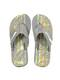

In [114]:
resized_image_1

In [115]:
rec_images_1 = []
for i in path_images_1:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images_1.append(resized_image)

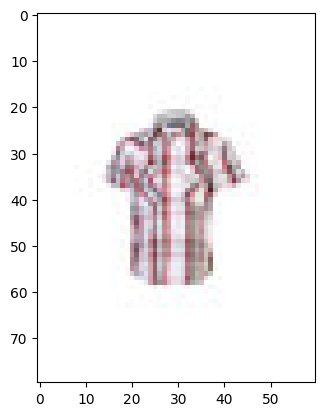

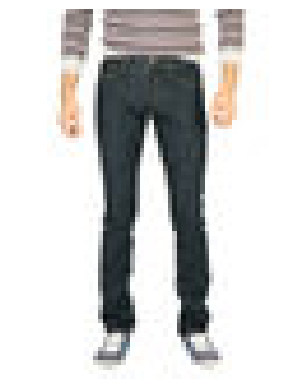

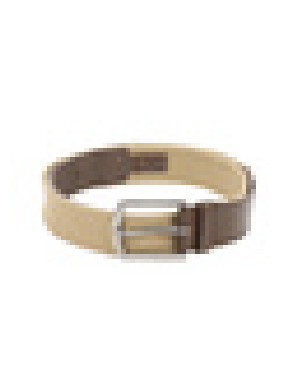

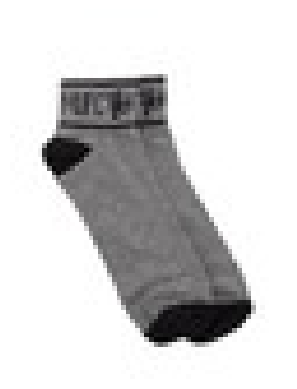

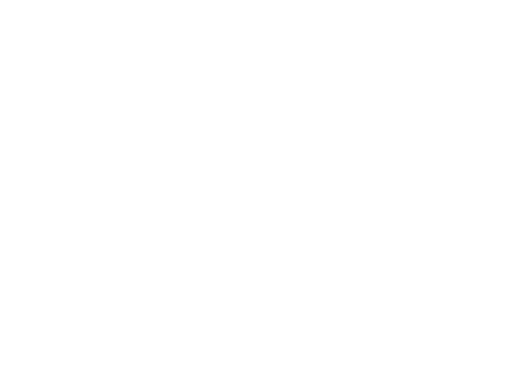

In [116]:
for i in rec_images_1:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

In [117]:
# processed_dataset.sample(10)

In [118]:
random_ids = [(66260,54550),(63225,49561),(73518,3636),(13336,9923),(84127,23252),(41266,38603),(35156,17240),(21708,40098),(99825,2627),(92141,30299)]

Recommended items: [30821, 43802]
Main item:


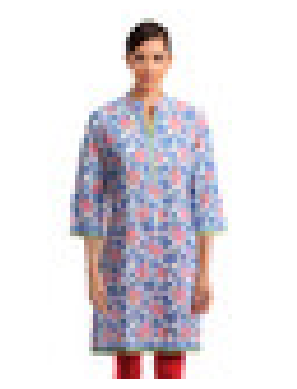

Recommended items:


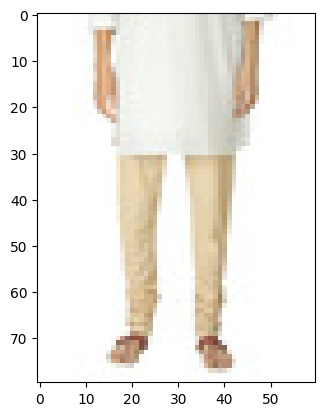

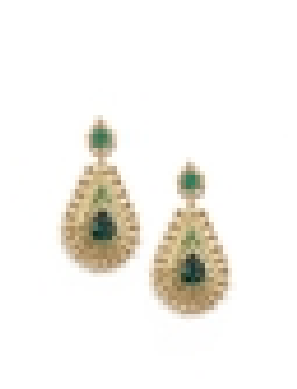

Recommended items: [5131, 32903, 48835, 12824]
Main item:


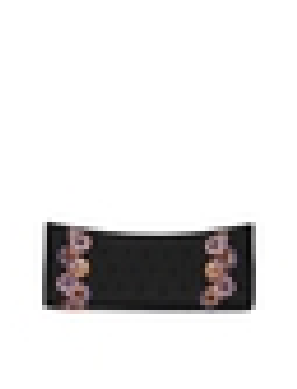

Recommended items:


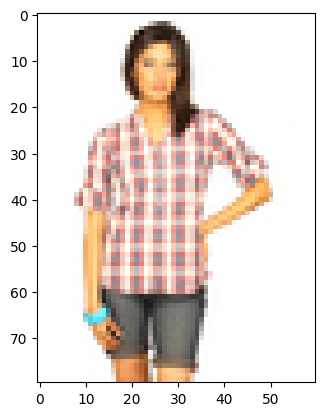

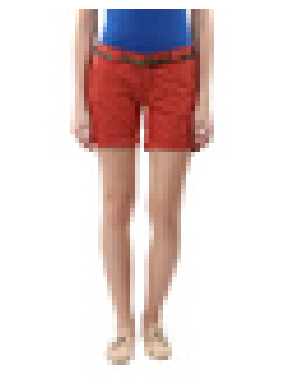

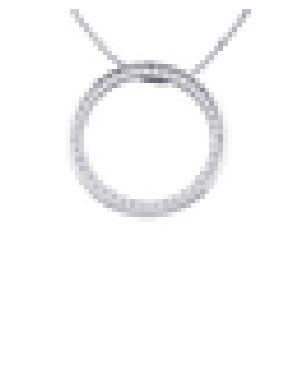

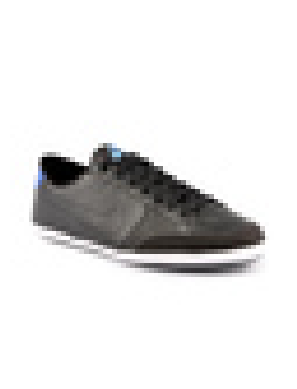

Recommended items: [53765, 8845, 37230]
Main item:


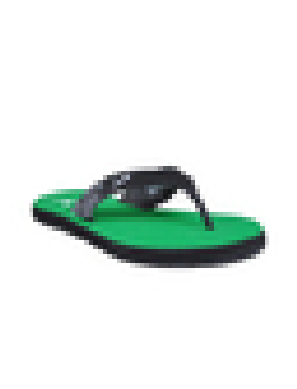

Recommended items:


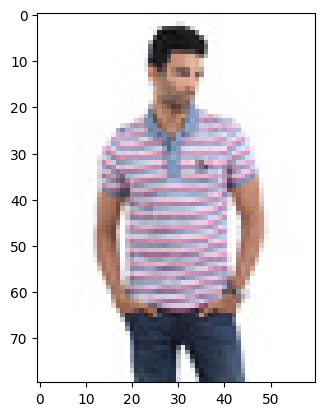

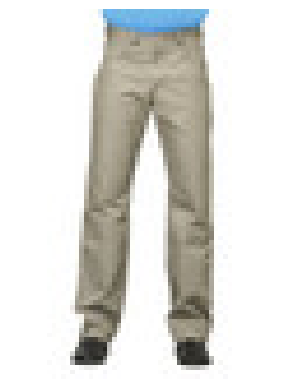

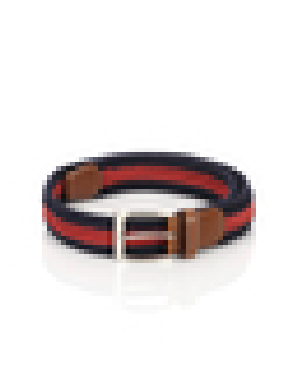

Recommended items: [1584, 26628]
Main item:


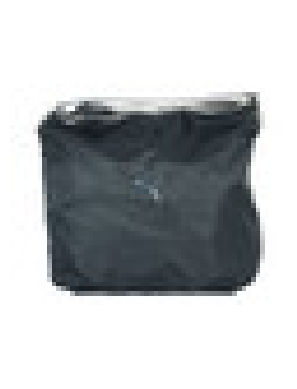

Recommended items:


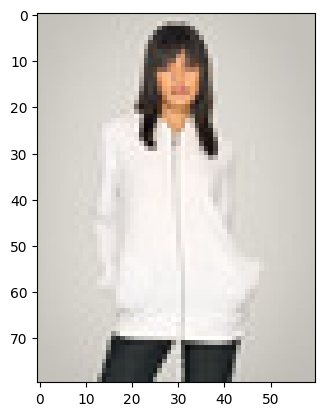

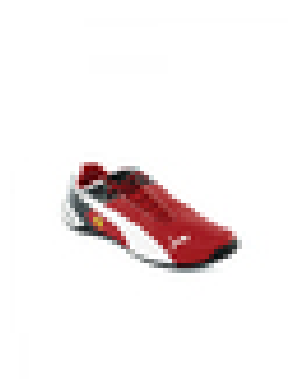

Recommended items: [9245, 32612]
Main item:


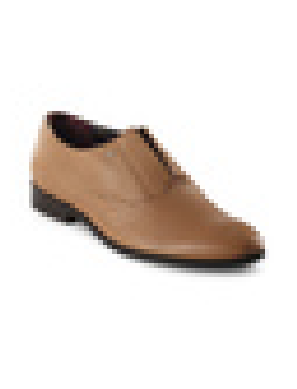

Recommended items:


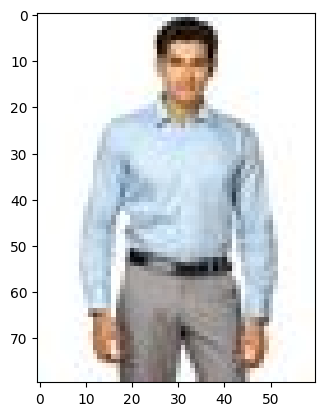

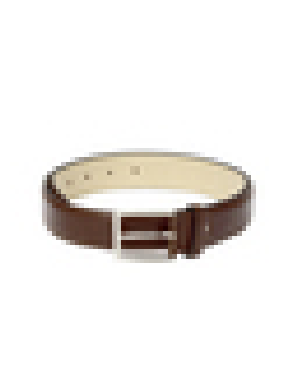

Recommended items: [52793, 16071, 11123, 3595]
Main item:


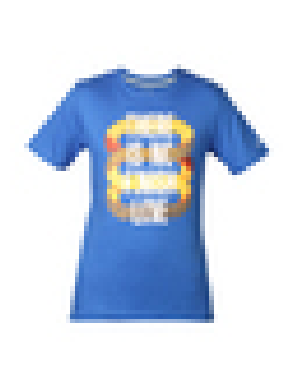

Recommended items:


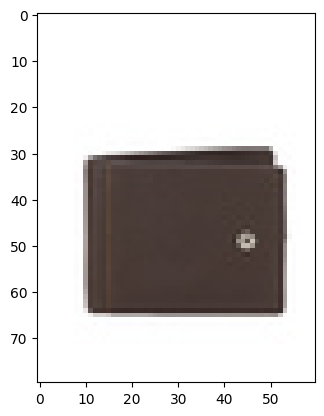

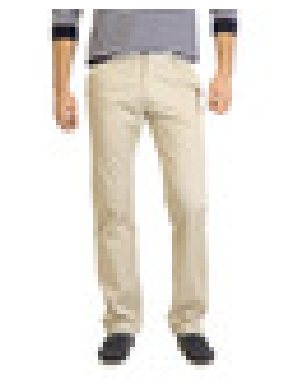

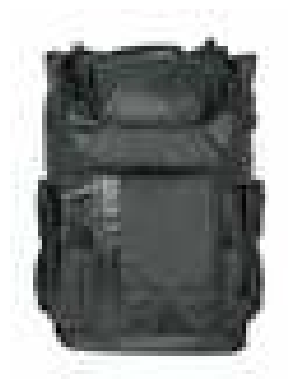

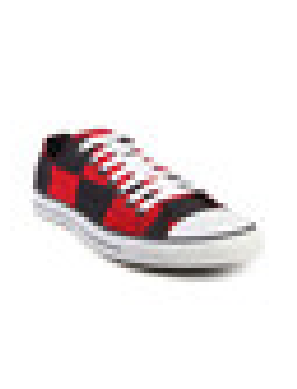

Recommended items: [47156, 37446, 48811, 18866, 26640]
Main item:


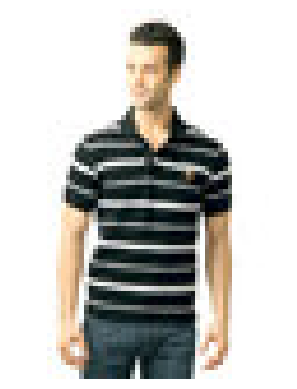

Recommended items:


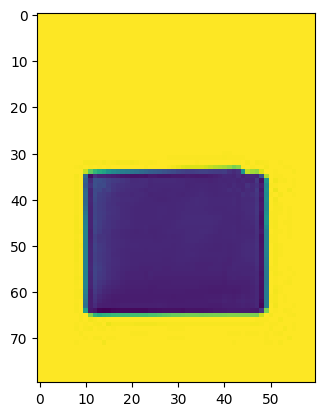

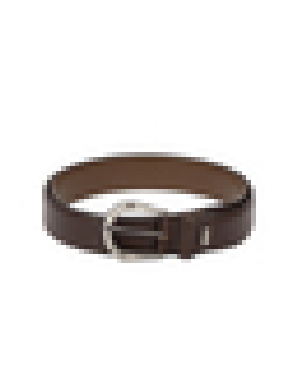

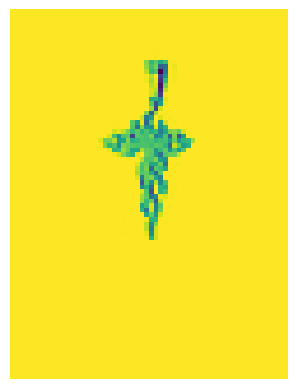

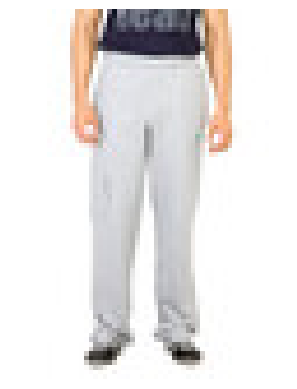

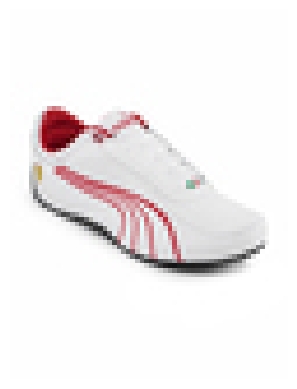

Recommended items: [14906, 14905, 27214, 9216]
Main item:


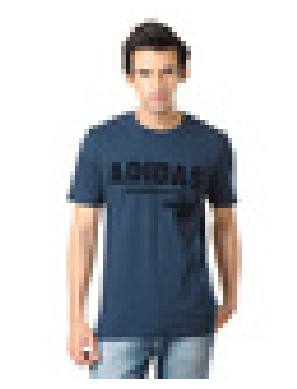

Recommended items:


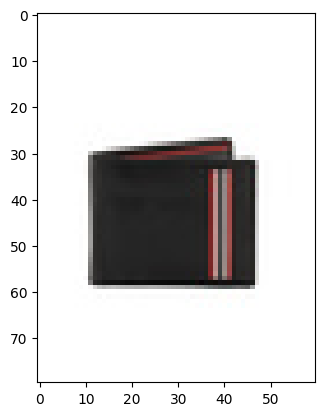

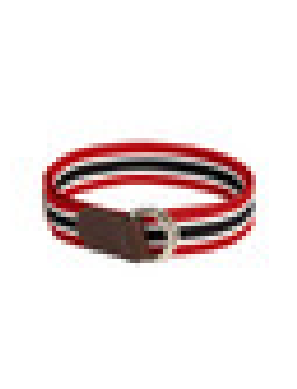

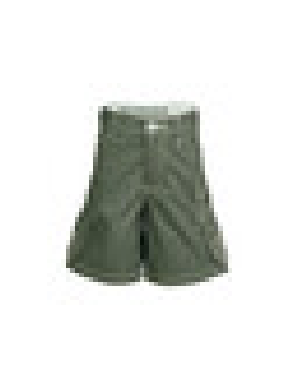

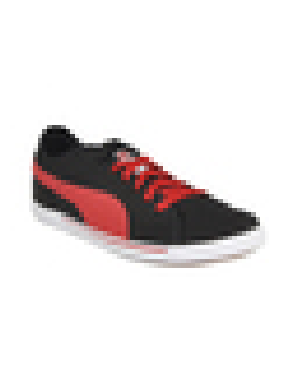

Recommended items: [43539, 51359]
Main item:


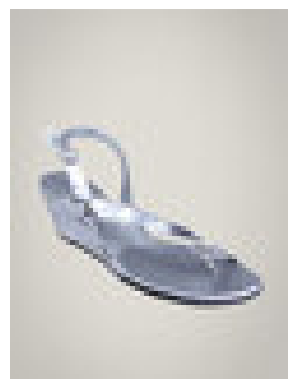

Recommended items:


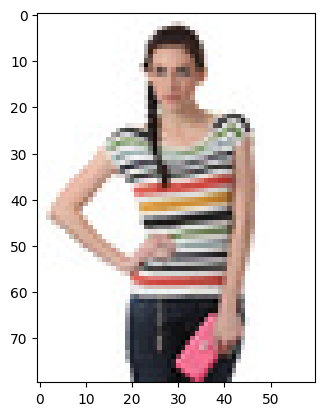

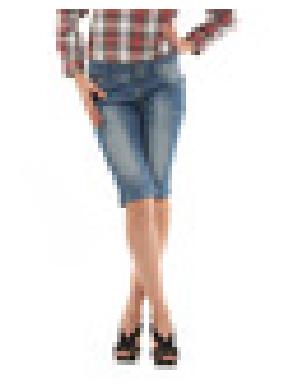

Recommended items: [37446, 48737, 12442, 28918, 12538, 6167]
Main item:


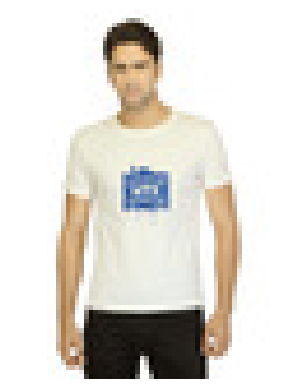

Recommended items:


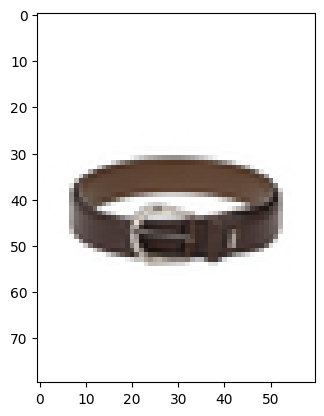

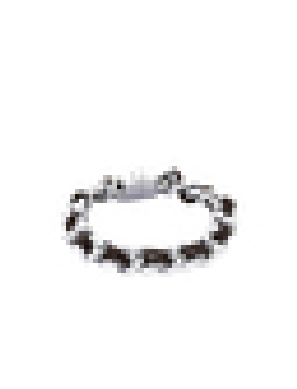

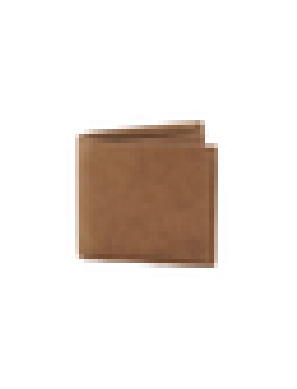

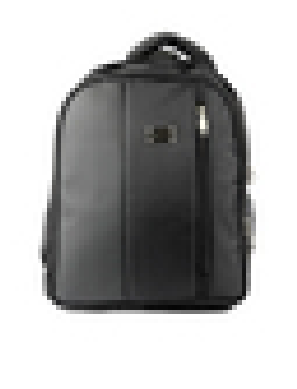

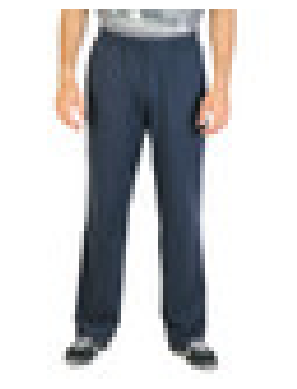

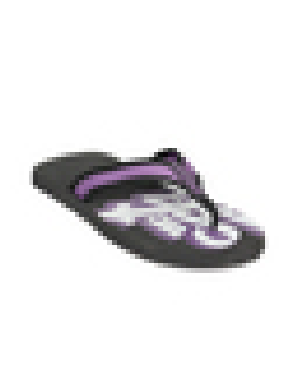

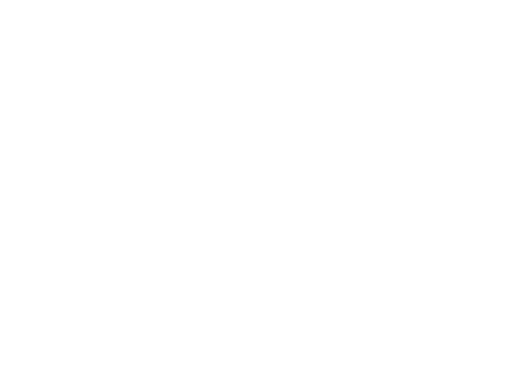

In [119]:
# Example usage:
for i in random_ids:
  user_id = i[0]
  item_id = i[1]
  recommended_items = recommend_outfit_items(user_id, item_id, processed_dataset, user_item_matrix, user_similarity_df, encoded_complementary_map)
  print("Recommended items:", recommended_items)
  path_images_1 = []
  image_url = "//content//drive//MyDrive//images//"
  for j in recommended_items:
    path_images_1.append(image_url + df[df.id==j]['filename'].values[0])
  path_images_1
  image_path_1 = f"//content//drive//MyDrive//images//{item_id}.jpg"

  pil_image_1 = Image.open(image_path_1)
  resized_image_1 = cv2.resize(np.array(pil_image_1), IMAGE_SIZE)

  print("Main item:")
  plt.imshow(resized_image_1)
  plt.axis("off")
  plt.show()

  print("Recommended items:")
  rec_images_1 = []
  for i in path_images_1:
      pil_image = Image.open(i)
      image_array = np.array(pil_image)
      resized_image = cv2.resize(image_array, IMAGE_SIZE)
      rec_images_1.append(resized_image)

  for i in rec_images_1:
      plt.imshow(i)
      plt.show()
      plt.axis("off")

# ***Evaluation***

In [94]:
import pandas as pd

# Assuming your dataset is in a DataFrame `df`
user_columns = ['user_id1', 'user_id2', 'user_id3', 'user_id4', 'user_id5']

# Melt the DataFrame to create one row for each user-item interaction
long_df = processed_dataset.melt(id_vars=['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
                           'baseColour', 'season', 'usage', 'productDisplayName', 'Month',
                           'cluster', 'ratings', 'Price (USD)', 'year', 'combined_features'],
                  value_vars=user_columns,
                  var_name='user_column',
                  value_name='user_id')

# Now, `long_df` contains one row for each user-item interaction
long_df

id  gender  masterCategory  subCategory  articleType  baseColour  \
0        8493       4               1            2           46           1   
1       30757       2               1           10           23          13   
2       14881       4               0            0           17           1   
3       48449       2               1           10           63           2   
4       12868       2               2            8           16           1   
...       ...     ...             ...          ...          ...         ...   
142750  54078       2               2            8           48          29   
142751  13183       2               2            8           48          42   
142752  10264       2               2            8           16           1   
142753  45378       4               2            8           14           1   
142754   5864       3               2            8            7          25   

        season  usage                                 productDisplayName  \
0            0      0                     Forever New Women Black Skirts   
1            2      1                 Fabindia Men Grey Mangalgiri Kurta   
2            2      0  United Colors of Benetton Women Solid Black Ha...   
3            2      0                 French Connection Men Blue T-shirt   
4            1      2                  Lee Cooper Men Formal Black Shoes   
...        ...    ...                                                ...   
142750       2      5    ADIDAS Men Orange F50 Adizero HG Football Shoes   
142751       0      5                 Fila Men Dls 96 White Sports Shoes   
142752       2      2    Clarks Men Goya Band Leather Black Formal Shoes   
142753       2      0                          Rocia Women Black Sandals   
142754       3      0  Converse Chuck Taylor All Star Unisex Navy Blu...   

        Month  cluster   ratings  Price (USD)      year  \
0           9        0  1.096569     1.078573 -0.890615   
1          11        1  0.315506    -0.423844  0.744939   
2          10        1 -0.465558     0.459931 -0.890615   
3           1        0  1.096569     0.459931  0.744939   
4           1        2 -0.465558    -0.865732  0.744939   
...       ...      ...       ...          ...       ...   
142750     11        0  1.096569     0.636686  0.744939   
142751      4        0  1.096569     1.697216 -0.890615   
142752      9        1  1.096569     0.813441  2.380493   
142753      9        1  1.096569     1.255328  0.744939   
142754      3        2 -1.246621    -1.837884 -0.890615   

                                        combined_features user_column  user_id  
0       4 1 1 2 46 -0.8906152906981095 9 1.09656908794...    user_id1    93810  
1       2 13 1 10 23 0.7449386531319587 11 0.315505720...    user_id1    24592  
2       4 1 0 0 17 -0.8906152906981095 10 -0.465557647...    user_id1    13278  
3       2 2 1 10 63 0.7449386531319587 1 1.09656908794...    user_id1    46048  
4       2 1 2 8 16 0.7449386531319587 1 -0.46555764740...    user_id1    28289  
...                                                   ...         ...      ...  
142750  2 29 2 8 48 0.7449386531319587 11 1.0965690879...    user_id5    90599  
142751  2 42 2 8 48 -0.8906152906981095 4 1.0965690879...    user_id5    78084  
142752  2 1 2 8 16 2.3804925969620268 9 1.096569087941...    user_id5    86418  
142753  4 1 2 8 14 0.7449386531319587 9 1.096569087941...    user_id5    40828  
142754  3 25 2 8 7 -0.8906152906981095 3 -1.2466210150...    user_id5    45003  

[142755 rows x 17 columns]

In [95]:
# Sample `n_items` items (ensure it's a reasonable number based on your dataset size)
n_items = 100  # For example, you want to sample 100 items
sampled_items = df['id'].drop_duplicates().sample(n=n_items, random_state=42)

# Get all rows for the sampled items
sampled_df = long_df[long_df['id'].isin(sampled_items)]

# Check the sampled dataset
sampled_df

id  gender  masterCategory  subCategory  articleType  baseColour  \
96      24597       4               1           10           63           6   
550     11878       2               2            8           16           1   
579     39956       2               2            4           15          43   
626     11432       4               1           10           58          32   
1661    53121       4               1           10           63          43   
...       ...     ...             ...          ...          ...         ...   
141387  53941       4               0            0           17          13   
141587   2501       2               2            8            7          33   
141761  36476       2               2            8            7           1   
141835  18404       2               2            8            7           4   
142142  35635       2               2            4           15           1   

        season  usage                                 productDisplayName  \
96           0      0         Little Miss Women Charcoal Printed T-shirt   
550          2      2         Franco Leone Men Formal Black Formal Shoes   
579          0      0                   Gas Men Lagoon Yellow Flip Flops   
626          0      0  United Colors of Benetton Women Winter Purple Top   
1661         2      0                        Myntra Women Yellow T-shirt   
...        ...    ...                                                ...   
141387       2      0                           Kiara Women Grey Handbag   
141587       0      0            Numero Uno Men's Casual Red Canvas Shoe   
141761       1      0                        Spinn Men Agile Black Shoes   
141835       0      0                        Skechers Men USA Brown Shoe   
142142       2      0                       Gliders Men Black Flip Flops   

        Month  cluster   ratings  Price (USD)      year  \
96          3        0  0.315506    -0.247089 -0.890615   
550         7        0  1.096569     1.078573  0.744939   
579         6        2 -0.465558    -0.335467  0.744939   
626         4        0  0.315506    -0.070334 -0.890615   
1661        2        2  0.315506    -0.600599  0.744939   
...       ...      ...       ...          ...       ...   
141387      9        1 -0.465558    -0.335467  0.744939   
141587      3        0  0.315506    -0.777354 -2.526169   
141761      5        1 -2.027684     0.459931  2.380493   
141835      0        2  0.315506    -1.042487 -0.890615   
142142     11        1 -0.465558    -0.777354  0.744939   

                                        combined_features user_column  user_id  
96      4 6 1 10 63 -0.8906152906981095 3 0.3155057202...    user_id1    57447  
550     2 1 2 8 16 0.7449386531319587 7 1.096569087941...    user_id1    38906  
579     2 43 2 4 15 0.7449386531319587 6 -0.4655576474...    user_id1    69598  
626     4 32 1 10 58 -0.8906152906981095 4 0.315505720...    user_id1    72021  
1661    4 43 1 10 63 0.7449386531319587 2 0.3155057202...    user_id1    94843  
...                                                   ...         ...      ...  
141387  4 13 0 0 17 0.7449386531319587 9 -0.4655576474...    user_id5    56961  
141587  2 33 2 8 7 -2.5261692345281777 3 0.31550572026...    user_id5    17936  
141761  2 1 2 8 7 2.3804925969620268 5 -2.027684382752...    user_id5    69634  
141835  2 4 2 8 7 -0.8906152906981095 0 0.315505720268...    user_id5    23242  
142142  2 1 2 4 15 0.7449386531319587 11 -0.4655576474...    user_id5    50135  

[500 rows x 17 columns]

In [96]:
# Create the user-item matrix for the sampled data
user_item_matrix_sampled = sampled_df.pivot_table(index='user_id', columns='id', values='ratings', aggfunc='mean', fill_value=0)

# Check the sampled user-item matrix
user_item_matrix_sampled


id       1793   1832   1866   2343   2501   2623   3128   3342   3870   3900   \
user_id                                                                         
10358      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10395      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10679      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10680      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10851      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
99016      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99166      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99167      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99192      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99539      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

id       ...  47381  48700  48933  53121  53941  54851  55618  56658  57273  \
user_id  ...                                                                  
10358    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10395    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10679    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10680    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10851    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
99016    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99166    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99167    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99192    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99539    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

id          59912  
user_id            
10358   -1.246621  
10395    0.000000  
10679    0.000000  
10680    0.000000  
10851    0.000000  
...           ...  
99016    0.000000  
99166    0.000000  
99167    0.000000  
99192    0.000000  
99539    0.000000  

[464 rows x 100 columns]

In [97]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_model(df, user_item_matrix, user_similarity_df, complementary_map):
    """
    Evaluate the collaborative filtering model on the entire dataset.

    Parameters:
        df (DataFrame): Original dataset containing user-item interactions.
        user_item_matrix (DataFrame): User-item interaction matrix.
        user_similarity_df (DataFrame): User similarity matrix.
        complementary_map (dict): Map of subcategories to complementary subcategories.

    Returns:
        dict: Evaluation metrics (precision, recall, mse, rmse).
    """
    total_precision = 0.0
    total_recall = 0.0
    mse_list = []
    total_recommendations = 0
    total_relevant_items = 0
    total_users = 0

    for user_id in user_item_matrix.index:
        # Ensure the user has at least one interaction
        if user_id not in user_item_matrix.index:
          print(f"User ID {user_id} not found in user interactions.")
          continue
        user_interactions = user_item_matrix.loc[user_id]
        interacted_items = user_interactions[user_interactions > 0].index.tolist()

        if not interacted_items:
            continue

        total_users += 1

        # Iterate over all items the user interacted with
        for target_item_id in interacted_items:
          if target_item_id not in df['id'].values:
            print(f"Product ID {target_item_id} not found in the dataset")
            continue
            # Generate recommendations
            recommendations = recommend_outfit_items(
                user_id=user_id,
                target_item_id=target_item_id,
                df=df,
                user_item_matrix=user_item_matrix,
                user_similarity_df=user_similarity_df,
                complementary_map=encoded_complementary_map
            )

            # Get relevant items (ground truth) for this user and target item
            target_item_row = df[df['id'] == target_item_id]
            target_subcategory = target_item_row.iloc[0]['subCategory']
            relevant_items = set(user_interactions[user_interactions > 0].index)
            complementary_items = df[df['subCategory'] != target_subcategory]['id'].tolist()
            relevant_complementary_items = relevant_items.intersection(complementary_items)

            # Calculate precision and recall for this user-item pair
            recommended_items = set(recommendations)
            relevant_recommendations = recommended_items.intersection(relevant_complementary_items)

            precision = len(relevant_recommendations) / len(recommended_items) if recommended_items else 0.0
            recall = len(relevant_recommendations) / len(relevant_complementary_items) if relevant_complementary_items else 0.0

            total_precision += precision
            total_recall += recall
            total_recommendations += len(recommended_items)
            total_relevant_items += len(relevant_complementary_items)

            # Calculate MSE for predicted vs actual ratings
            if 'ratings' in df.columns:
                actual_ratings = [user_interactions[item_id] for item_id in recommended_items if item_id in user_interactions]
                predicted_ratings = [user_item_matrix.loc[user_id, item_id] for item_id in recommended_items if item_id in user_item_matrix.columns]
                if actual_ratings and predicted_ratings:
                    mse = mean_squared_error(actual_ratings, predicted_ratings)
                    mse_list.append(mse)

    # Calculate overall metrics
    avg_precision = total_precision / total_users if total_users > 0 else 0.0
    avg_recall = total_recall / total_users if total_users > 0 else 0.0
    mse = np.mean(mse_list) if mse_list else 0.0
    rmse = np.sqrt(mse)

    return {
        "precision": avg_precision,
        "recall": avg_recall,
        "mse": mse,
        "rmse": rmse
    }


In [150]:
evaluation_results = evaluate_model(
    df=sampled_df,  # Use the sampled data
    user_item_matrix=user_item_matrix_sampled,  # Use the sampled user-item matrix
    user_similarity_df=user_similarity_df,  # Use the user similarity matrix
    complementary_map=encoded_complementary_map  # Use the complementary map
)


print("Evaluation Results:")
print(f"Precision: {evaluation_results['precision']:.4f}")
print(f"Recall: {evaluation_results['recall']:.4f}")
print(f"MSE: {evaluation_results['mse']:.4f}")
print(f"RMSE: {evaluation_results['rmse']:.4f}")

Evaluation Results:
Precision: 0.0000
Recall: 0.0000
MSE: 0.0000
RMSE: 0.0000


In [99]:
# Check if the item exists in the DataFrame before accessing it
if 26406 in df['id'].values:
    print("Item 26406 is in the dataset.")
else:
    print("Item 26406 is not in the dataset.")


Item 26406 is not in the dataset.


In [100]:
user_item_matrix_sampled

id       1793   1832   1866   2343   2501   2623   3128   3342   3870   3900   \
user_id                                                                         
10358      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10395      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10679      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10680      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10851      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
99016      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99166      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99167      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99192      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99539      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

id       ...  47381  48700  48933  53121  53941  54851  55618  56658  57273  \
user_id  ...                                                                  
10358    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10395    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10679    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10680    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10851    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
99016    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99166    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99167    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99192    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
99539    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

id          59912  
user_id            
10358   -1.246621  
10395    0.000000  
10679    0.000000  
10680    0.000000  
10851    0.000000  
...           ...  
99016    0.000000  
99166    0.000000  
99167    0.000000  
99192    0.000000  
99539    0.000000  

[464 rows x 100 columns]

In [101]:
# def evaluate_collaborative_recommendations_verbose(
#     user_ids, df, user_item_matrix, user_similarity_df, complementary_map, k=10
# ):
#     total_correct_recommendations = 0
#     total_recommendations = 0
#     total_complementary_subcategories = 0
#     precision_sum = 0
#     recall_sum = 0
#     f1_sum = 0

#     print("Evaluation Results for Users:")
#     print("-" * 50)

#     for user_id in user_ids:
#         recommendations = []
#         try:
#             # Iterate through all items interacted by the user
#             user_interacted_items = user_item_matrix.loc[user_id]
#             interacted_items = user_interacted_items[user_interacted_items > 0].index.tolist()

#             for target_item_id in interacted_items:
#                 original_subcategory = df.loc[df['id'] == target_item_id, 'subCategory'].values[0]
#                 complementary_subcategories = encoded_complementary_map.get(original_subcategory, [])
#                 recommended_items = recommend_outfit_items(
#                     user_id, target_item_id, df, user_item_matrix, user_similarity_df, complementary_map
#                 )
#                 recommendations.extend(recommended_items)

#             recommendations = list(set(recommendations))  # Remove duplicates
#         except KeyError:
#             print(f"User ID {user_id} not found. Skipping.")
#             continue

#         if recommendations:
#             # Calculate metrics per user
#             correct_count = 0

#             for item_id in recommendations:
#                 item_row = df[df['id'] == item_id].iloc[0]
#                 item_subcategory = item_row['subCategory']

#                 # Check if the recommended item's subcategory is complementary
#                 if item_subcategory in complementary_subcategories:
#                     correct_count += 1

#             total_correct_recommendations += correct_count
#             total_complementary_subcategories += len(complementary_subcategories)
#             total_recommendations += len(recommendations)

#             # Precision@K and Recall@K for this user
#             precision = correct_count / len(recommendations) if recommendations else 0
#             recall = correct_count / len(complementary_subcategories) if complementary_subcategories else 0
#             f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

#             # Sum metrics for averages
#             precision_sum += precision
#             recall_sum += recall
#             f1_sum += f1_score

#             # # Log user evaluation
#             # print(f"User ID: {user_id}")
#             # print(f"Precision@K: {precision:.2%}, Recall@K: {recall:.2%}, F1@K: {f1_score:.2%}")
#             # print(f"Correct Recommendations: {correct_count}, Total Recommendations: {len(recommendations)}")
#             # print("-" * 50)

#     # Aggregate metrics
#     num_users = len(user_ids)
#     average_precision = precision_sum / num_users if num_users > 0 else 0
#     average_recall = recall_sum / num_users if num_users > 0 else 0
#     average_f1 = f1_sum / num_users if num_users > 0 else 0
#     coverage = total_recommendations / total_complementary_subcategories if total_complementary_subcategories > 0 else 0

#     # Print final evaluation
#     print("Final Evaluation Results:")
#     print(f"Average Precision@K: {average_precision:.2%}")
#     print(f"Average Recall@K: {average_recall:.2%}")
#     print(f"Average F1@K: {average_f1:.2%}")
#     print(f"Coverage: {coverage:.2%}")
#     print(f"Total Complementary Subcategories: {total_complementary_subcategories}")
#     print(f"Total Correct Recommendations: {total_correct_recommendations}")
#     print(f"Total Recommendations: {total_recommendations}")
#     print("-" * 50)


# # Example usage
# user_ids_to_evaluate = user_item_matrix.index.tolist()[:100]  # Limit to first 100 users for evaluation
# evaluate_collaborative_recommendations_verbose(
#     user_ids_to_evaluate, processed_dataset, user_item_matrix, user_similarity_df, encoded_complementary_map
# )

In [102]:
# def evaluate_collaborative_recommendations_verbose(
#     user_ids, df, user_item_matrix, user_similarity_df, complementary_map
# ):
#     total_correct_recommendations = 0
#     total_recommendations = 0
#     total_complementary_subcategories = 0
#     precision_sum = 0
#     recall_sum = 0
#     f1_sum = 0

#     print("Evaluation Results for Users:")
#     print("-" * 50)

#     for user_id in user_ids:
#         recommendations = []
#         try:
#             # Iterate through all items interacted by the user
#             user_interacted_items = user_item_matrix.loc[user_id]
#             interacted_items = user_interacted_items[user_interacted_items > 0].index.tolist()

#             for target_item_id in interacted_items:
#                 recommended_items = recommend_outfit_items(
#                     user_id, target_item_id, df, user_item_matrix, user_similarity_df, complementary_map
#                 )
#                 original_subcategory = df.loc[df['id'] == product_id, 'subCategory'].values[0]
#                 complementary_subcategories = encoded_complementary_map.get(original_subcategory, [])
#                 recommendations.extend(recommended_items)

#             recommendations = list(set(recommendations))  # Remove duplicates
#         except KeyError:
#             print(f"User ID {user_id} not found. Skipping.")
#             continue

#         if recommendations:
#             # Calculate metrics per user
#             correct_count = 0

#             for item_id in recommendations:
#                 item_row = df[df['id'] == item_id].iloc[0]
#                 item_subcategory = item_row['subCategory']


#                 # Check if the recommended item's subcategory is complementary
#                 if item_subcategory in complementary_subcategories:
#                     correct_count += 1

#             total_correct_recommendations += correct_count
#             total_complementary_subcategories += len(complementary_subcategories)
#             total_recommendations += len(recommendations)

#             # Precision@K and Recall@K for this user
#             precision = correct_count / len(recommendations) if recommendations else 0
#             recall = correct_count / len(complementary_subcategories) if complementary_subcategories else 0
#             f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

#             # Sum metrics for averages
#             precision_sum += precision
#             recall_sum += recall
#             f1_sum += f1_score

#             # # Log user evaluation
#             # print(f"User ID: {user_id}")
#             # print(f"Precision@K: {precision:.2%}, Recall@K: {recall:.2%}, F1@K: {f1_score:.2%}")
#             # print(f"Correct Recommendations: {correct_count}, Total Recommendations: {len(recommendations)}")
#             # print("-" * 50)

#     # Aggregate metrics
#     num_users = len(user_ids)
#     average_precision = precision_sum / num_users if num_users > 0 else 0
#     average_recall = recall_sum / num_users if num_users > 0 else 0
#     average_f1 = f1_sum / num_users if num_users > 0 else 0
#     coverage = total_recommendations / total_complementary_subcategories if total_complementary_subcategories > 0 else 0

#     # Print final evaluation
#     print("Final Evaluation Results:")
#     print(f"Average Precision@K: {average_precision:.2%}")
#     print(f"Average Recall@K: {average_recall:.2%}")
#     print(f"Average F1@K: {average_f1:.2%}")
#     print(f"Coverage: {coverage:.2%}")
#     print(f"Total Complementary Subcategories: {total_complementary_subcategories}")
#     print(f"Total Correct Recommendations: {total_correct_recommendations}")
#     print(f"Total Recommendations: {total_recommendations}")
#     print("-" * 50)

# import random

# # Randomly sample 100 users from the available user IDs
# user_ids_to_evaluate = random.sample(user_item_matrix.index.tolist(), 100)

# # Perform evaluation with the randomly sampled users
# evaluate_collaborative_recommendations_verbose(
#     user_ids_to_evaluate, processed_dataset, user_item_matrix, user_similarity_df, encoded_complementary_map
# )


In [103]:
# def evaluate_collaborative_recommendations_cumulative(
#     user_ids, df, user_item_matrix, user_similarity_df, complementary_map, k=10
# ):
#     total_correct_recommendations = 0
#     total_recommendations = 0
#     total_relevant_items = 0

#     for user_id in user_ids:
#         recommendations = set()
#         try:
#             # Interactions of the user
#             user_interacted_items = user_item_matrix.loc[user_id]
#             interacted_items = user_interacted_items[user_interacted_items > 0].index.tolist()

#             for target_item_id in interacted_items:
#                 original_subcategory = df.loc[df['id'] == product_id, 'subCategory'].values[0]
#                 complementary_subcategories = encoded_complementary_map.get(original_subcategory, [])
#                 recommended_items = recommend_outfit_items(
#                     user_id, target_item_id, df, user_item_matrix, user_similarity_df, complementary_map
#                 )
#                 recommendations.update(recommended_items)  # Add to cumulative recommendations

#         except KeyError:
#             print(f"User ID {user_id} not found. Skipping.")
#             continue

#         if recommendations:
#             # Identify correct recommendations (complementary items)
#             correct_recommendations = 0
#             for item_id in recommendations:
#                 item_row = df[df['id'] == item_id].iloc[0]
#                 item_subcategory = item_row['subCategory']

#                 # Check if the item's subcategory is complementary
#                 for interacted_item in interacted_items:
#                     interacted_row = df[df['id'] == interacted_item].iloc[0]
#                     interacted_subcategory = interacted_row['subCategory']
#                     complementary_subcategories = complementary_map.get(interacted_subcategory, [])

#                     if item_subcategory in complementary_subcategories:
#                         correct_recommendations += 1
#                         break  # Prevent counting the same item multiple times

#             # Update cumulative totals
#             total_correct_recommendations += correct_recommendations
#             total_recommendations += len(recommendations)
#             total_relevant_items += len(interacted_items) * len(complementary_map)  # Relevant items per user

#     # Compute cumulative metrics
#     precision = total_correct_recommendations / total_recommendations if total_recommendations > 0 else 0
#     recall = total_correct_recommendations / total_relevant_items if total_relevant_items > 0 else 0
#     f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

#     # Print final evaluation
#     print("Final Evaluation Results (Cumulative):")
#     print(f"Total Correct Recommendations: {total_correct_recommendations}")
#     print(f"Total Recommendations: {total_recommendations}")
#     print(f"Total Relevant Items: {total_relevant_items}")
#     print(f"Precision@K: {precision:.2%}")
#     print(f"Recall@K: {recall:.2%}")
#     print(f"F1@K: {f1_score:.2%}")

# # Example usage
# user_ids_to_evaluate = user_item_matrix.index.tolist()[:100]  # Limit to first 100 users for evaluation
# evaluate_collaborative_recommendations_cumulative(
#     user_ids_to_evaluate, processed_dataset, user_item_matrix, user_similarity_df, encoded_complementary_map
# )

In [115]:
import time

In [157]:
import tensorflow as tf
import numpy as np
import random
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_collaborative_model_with_samples(model_function, df, user_item_matrix, complementary_map, k=5, num_samples=10):
    precision_at_k = []
    recall_at_k = []
    f1_at_k = []

    # Randomly select samples from the dataset
    sampled_items = random.sample(df['id'].tolist(), num_samples)

    for target_item_id in sampled_items:
        target_item_row = df[df['id'] == target_item_id].iloc[0]
        target_subCategory = target_item_row['subCategory']
        true_complementary_categories = complementary_map.get(target_subCategory, [])

        # Generate true complementary indices
        true_complementary_indices = [
            cat for cat in true_complementary_categories
            if cat in df['subCategory'].unique()
        ]

        # Find users who have interacted with the target item
        interacted_users = user_item_matrix[user_item_matrix[target_item_id] > 0].index.tolist()

        for user_id in interacted_users:
            # Get recommendations for each user-item pair
            recommendations = model_function(
                user_id=user_id,
                target_item_id=target_item_id,
                df=df,
                user_item_matrix=user_item_matrix,
                user_similarity_df=user_similarity_df,
                complementary_map=complementary_map
            )

            # Convert recommendations to subCategories
            recommended_subCategories = [
                df[df['id'] == item_id]['subCategory'].iloc[0] for item_id in recommendations
            ]

            # Generate binary arrays for evaluation
            y_true = [1 if subCategory in true_complementary_indices else 0 for subCategory in df['subCategory'].unique()]
            y_pred = [1 if subCategory in recommended_subCategories else 0 for subCategory in df['subCategory'].unique()]

            # Calculate metrics for the user-item pair
            precision = precision_score(y_true, y_pred, zero_division=1)
            recall = recall_score(y_true, y_pred, zero_division=1)
            f1 = f1_score(y_true, y_pred, zero_division=1)

            precision_at_k.append(precision)
            recall_at_k.append(recall)
            f1_at_k.append(f1)

    # Average metrics over all sampled items and users
    avg_precision_at_k = np.mean(precision_at_k)
    avg_recall_at_k = np.mean(recall_at_k)
    avg_f1_at_k = np.mean(f1_at_k)

    return avg_precision_at_k, avg_recall_at_k, avg_f1_at_k


# Example usage
avg_precision, avg_recall, avg_f1 = evaluate_collaborative_model_with_samples(
    model_function=recommend_outfit_items,
    df=processed_dataset,
    user_item_matrix=user_item_matrix,
    complementary_map=encoded_complementary_map,
    k=5,  
    num_samples=1000
)
print(f"Precision at K: {avg_precision}")
print(f"Recall at K: {avg_recall}")
print(f"F1 Score at K: {avg_f1}")


Precision at K: 1.0
Recall at K: 0.47497095623223556
F1 Score at K: 0.6177519848865346


In [109]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [147]:
import random
from sklearn.metrics import precision_score,recall_score,f1_score
# Evaluation function to sample from the dataset and map user to item
def evaluate_collaborative_model_with_samples(model_function, df, user_item_matrix, complementary_map, k=5, num_samples=10):
    precision_at_k = []
    recall_at_k = []
    f1_at_k = []

    # Randomly select samples from the dataset
    sampled_items = random.sample(df['id'].tolist(), num_samples)

    for target_item_id in sampled_items:
        target_item_row = df[df['id'] == target_item_id].iloc[0]
        target_subCategory = target_item_row['subCategory']
        true_complementary_categories = complementary_map.get(target_subCategory, [])

        # Generate true complementary indices
        true_complementary_indices = [
            cat for cat in true_complementary_categories
            if cat in df['subCategory'].unique()
        ]

        # Find users who have interacted with the target item
        interacted_users = user_item_matrix[user_item_matrix[target_item_id] > 0].index.tolist()

        for user_id in interacted_users:
            # Get recommendations for each user-item pair
            recommendations = model_function(
                user_id=user_id,
                target_item_id=target_item_id,
                df=df,
                user_item_matrix=user_item_matrix,
                user_similarity_df=user_similarity_df,
                complementary_map=complementary_map
            )

            # Convert recommendations to subCategories
            recommended_subCategories = [
                df[df['id'] == item_id]['subCategory'].iloc[0] for item_id in recommendations
            ]

            # Generate binary arrays for evaluation
            y_true = [1 if subCategory in true_complementary_indices else 0 for subCategory in df['subCategory'].unique()]
            y_pred = [1 if subCategory in recommended_subCategories else 0 for subCategory in df['subCategory'].unique()]

            # Calculate metrics for the user-item pair
            precision = precision_score(y_true, y_pred, zero_division=1)
            recall = recall_score(y_true, y_pred, zero_division=1)
            f1 = f1_score(y_true, y_pred, zero_division=1)

            precision_at_k.append(precision)
            recall_at_k.append(recall)
            f1_at_k.append(f1)

    # Average metrics over all sampled items and users
    avg_precision_at_k = np.mean(precision_at_k)
    avg_recall_at_k = np.mean(recall_at_k)
    avg_f1_at_k = np.mean(f1_at_k)

    return avg_precision_at_k, avg_recall_at_k, avg_f1_at_k


# Example usage
avg_precision, avg_recall, avg_f1 = evaluate_collaborative_model_with_samples(
    model_function=recommend_outfit_items,
    df=processed_dataset,
    user_item_matrix=user_item_matrix,
    complementary_map=encoded_complementary_map,
    k=5,  # Top 3 recommendations
    num_samples=1000  # Evaluate on 10 samples
)

print(f"Precision at K: {avg_precision}")
print(f"Recall at K: {avg_recall}")
print(f"F1 Score at K: {avg_f1}")


KeyboardInterrupt: 

In [146]:
!nvidia-smi

Thu Nov 21 10:34:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   35C    P8              5W /   35W |    3901MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [138]:
import tensorflow as tf
import time

# Define a large matrix multiplication task
size = 10000
a = tf.random.normal((size, size))
b = tf.random.normal((size, size))

# Measure execution time on CPU
with tf.device('/CPU:0'):
    start_time = time.time()
    c = tf.matmul(a, b)
    print("CPU time:", time.time() - start_time)

# Measure execution time on GPU
with tf.device('/GPU:0'):
    start_time = time.time()
    c = tf.matmul(a, b)
    print("GPU time:", time.time() - start_time)


CPU time: 14.647557735443115
GPU time: 0.5979399681091309
